# **Inference RT-DETR**

In [1]:
import torch

# CUDAが使えるかどうかを確認
cuda_available = torch.cuda.is_available()

if cuda_available:
    print(f"CUDA is available! GPU: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available.")
     

CUDA is available! GPU: Quadro RTX 5000


In [2]:
#環境の確認
import torch
import sys
print(f"Python version: {sys.version}")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"PyTorch CUDA version: {torch.version.cuda}")

Python version: 3.8.6 (tags/v3.8.6:db45529, Sep 23 2020, 15:52:53) [MSC v.1927 64 bit (AMD64)]
PyTorch version: 2.4.1+cu121
CUDA available: True
PyTorch CUDA version: 12.1


In [ ]:
# Inference London-bus image
from ultralytics import RTDETR
import wget
import cv2
import matplotlib.pyplot as plt
import os

# RTDETRモデルのダウンロードと初期化
model_path = r'models\rtdetr-l.pt'

try:
    model = RTDETR(model_path)
except:
    # モデルディレクトリが存在しない場合は作成
    os.makedirs(os.path.dirname(model_path), exist_ok=True)
    
    # モデルをダウンロードして指定したパスに保存
    wget.download('https://github.com/ultralytics/assets/releases/download/v0.0.0/rtdetr-l.pt', model_path)
    model = RTDETR(model_path)

# 推論実行
image_path = 'london-buses.jpg'
results = model(image_path)

# 結果の表示と保存
for r in results:
    # 画像をプロットして表示
    # plt.figure(figsize=(12, 8))
    # plt.imshow(cv2.cvtColor(r.plot(), cv2.COLOR_BGR2RGB))
    # plt.axis('off')
    # #plt.show()
    
    # 結果の保存
    cv2.imwrite('result.jpg', r.plot())


image 1/1 c:\Users\ykita\ROP_AI_project\london-buses.jpg: 640x640 16 persons, 2 cars, 1 bus, 249.8ms
Speed: 7.0ms preprocess, 249.8ms inference, 13.7ms postprocess per image at shape (1, 3, 640, 640)


# **Test new model**


image 1/1 C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1698\IMG_1698_0003.jpg: 640x640 (no detections), 97.5ms
Speed: 5.0ms preprocess, 97.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


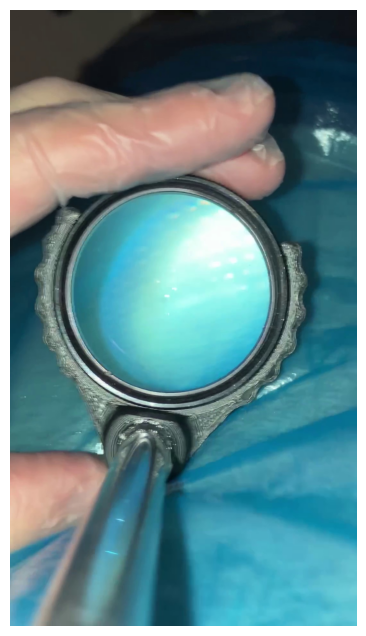

In [5]:
model = RTDETR(r"C:\Users\ykita\FacePhoto_instance\models\135best_rtdetr.pt")

# 推論実行
image_path = r'C:\Users\ykita\ROP_AI_project\ROP_image\IMG_1698\IMG_1698_0003.jpg'
results = model(image_path)

# 結果の表示と保存
for r in results:
    # 画像をプロットして表示
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(r.plot(), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    
    # 結果の保存
    cv2.imwrite('result.jpg', r.plot())


In [7]:
from ultralytics import RTDETR
import wget
import cv2
import matplotlib.pyplot as plt

# モデルが未定義ならロードする
try:
    model  # 変数modelが定義されているか確認
except NameError:
    print("modelが未定義のため、ロードを実行します。")
    model = RTDETR(r"C:\Users\ykita\FacePhoto_instance\models\135best_rtdetr.pt")

# 推論を実行: YOLOの推論
image_path = r'C:\Users\ykita\FacePhoto_instance\201-295\Image\293-20200311-6-095803_287b73c1d0b04ca725de2651547efd9a530231320625fb361bef3708dc3df9ee.jpg'
results = model(image_path, save=False)

for r in results:
    boxes = r.boxes  # YOLOv8の場合

    # YOLO形式出力
    for box in boxes:
        cls_id = int(box.cls[0])  # クラスID
        x_center, y_center, width, height = box.xywhn[0]

        # YOLO形式: class x_center y_center width height
        # 小数点以下6桁で出力したい場合
        print(f"{cls_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")

    # 検出結果を画像に描画して表示
    # plt.figure(figsize=(12, 8))
    # plt.imshow(cv2.cvtColor(r.plot(), cv2.COLOR_BGR2RGB))
    # plt.axis('off')
    # plt.show()

    # 結果の保存
    #cv2.imwrite('result.jpg', r.plot())



image 1/1 C:\Users\ykita\FacePhoto_instance\201-295\Image\293-20200311-6-095803_287b73c1d0b04ca725de2651547efd9a530231320625fb361bef3708dc3df9ee.jpg: 640x640 1 Right_eye, 1 Left_eye, 771.9ms
Speed: 6.0ms preprocess, 771.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
0 0.268958 0.487141 0.170173 0.112953
1 0.687053 0.477957 0.160687 0.102739


In [ ]:
#Web画像の場合

from ultralytics import RTDETR
import wget
import cv2
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# モデルが未定義ならロードする
try:
    model  # 変数modelが定義されているか確認
except NameError:
    print("modelが未定義のため、ロードを実行します。")
    model = RTDETR(r"C:\Users\ykita\FacePhoto_instance\models\135best_rtdetr.pt")

# 画像URLの指定
url = "https://365dentist.jp/wp-content/uploads/2023/06/26579868_s.jpg"

# 画像のダウンロード
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# 推論実行
results = model(img)

# 結果の表示と保存
for r in results:
    # 画像をプロットして表示
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(r.plot(), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# **RT-DETR トレーニングフォルダ構成**
```
準備する形
project_root/
│
└── data/
    |
    │
    ├── images/ --> データセットから移行
    │   ├── img1.jpg
    │   ├── img2.jpg
    │   └── ...
    │   
    ├── labels/ --> CVATからそのまま移す      　　　
    |       ├── img1.txt
    |       ├── img2.txt
    |       └── ...
    |
    | 
    ├── Train.txt　　　　　　# トレーニングファイルのリスト --> CVATからそのまま移す
    │
    └── dataset.yaml        # データセット設定ファイル  --> 新たに作成




最終形
project_root/
│
└── data/
    |
    │
    ├── train/
    │   ├── images/       # トレーニング用の画像
    │   │   ├── img1.jpg
    │   │   ├── img2.jpg
    │   │   └── ...
    │   │
    │   └── labels/      # トレーニング用のラベル（アノテーション）
    │       ├── img1.txt
    │       ├── img2.txt
    │       └── ...
    │
    ├── val/
    │   ├── images/      # 検証用の画像
    │   │   ├── img1.jpg
    │   │   └── ...
    │   │
    │   └── labels/     # 検証用のラベル
    │       ├── img1.txt
    │       └── ...
    │
    ├── test/           # (オプション) テスト用のデータセット
    |   ├── images/
    |   └── labels/
    │
    ├── Train.txt           # トレーニングファイルのリスト
    │
    └── dataset.yaml        # データセット設定ファイル:
```


## **dataset.yaml**

```
# train and val data as 1) directory: path/images/, 2) file: path/images.txt, or 3) list: [path1/images/, path2/images/]
train: ./data/images/train
val: ./data/images/valid

# number of classes
nc: 2

# class names:
  0: Right_eye
  1: Left_eye

```

In [ ]:
# このスクリプトは、指定されたディレクトリ内のラベルファイルと画像ファイルを
# 以下のようにコピーします：
#
# 1. source_labels_dir/LABELS_xxxx/ 内の全ファイル → destination_labels_dir/
# 2. source_images_dir/IMG_xxxx/ 内の全ファイル → destination_images_dir/
#
# 処理対象のディレクトリは、label_dirとimage_dirのリストで指定します。
# 各ディレクトリ内のファイルは全て、指定された出力先ディレクトリにコピーされます。
# tqdmを使用して、コピーの進捗状況をプログレスバーで表示します。

import shutil
import os
from tqdm import tqdm

# コピー元ディレクトリ
source_labels_dir = r'C:\Users\ykita\ROP_AI_project\ROP_image'
source_images_dir = r'C:\Users\ykita\ROP_AI_project\ROP_image'

# コピー先ディレクトリ
destination_labels_dir = r'C:\Users\ykita\ROP_AI_project\data\labels'
destination_images_dir = r'C:\Users\ykita\ROP_AI_project\data\images'

# 処理対象のディレクトリリスト
label_dir = ['LABELS_1703_lens_seg']
image_dir = ['IMG_1703_lens']


# destination_labels_dirとdestination_images_dirが存在する場合は削除し、新規作成する
if os.path.exists(destination_labels_dir):
    shutil.rmtree(destination_labels_dir)
os.makedirs(destination_labels_dir, exist_ok=True)

if os.path.exists(destination_images_dir):
    shutil.rmtree(destination_images_dir)
os.makedirs(destination_images_dir, exist_ok=True)

# ラベルファイルのコピー
for label_folder in tqdm(label_dir, desc="ラベルファイルのコピー中"):
    source_folder = os.path.join(source_labels_dir, label_folder)
    # フォルダ内の全ファイルを取得
    if os.path.isdir(source_folder):
        files = os.listdir(source_folder)
        for file in files:
            src = os.path.join(source_folder, file)
            dst = os.path.join(destination_labels_dir, file)
            shutil.copy(src, dst)
            print(f"コピーしました: {src} -> {dst}")

# 画像ファイルのコピー
for image_folder in tqdm(image_dir, desc="画像ファイルのコピー中"):
    source_folder = os.path.join(source_images_dir, image_folder)
    # フォルダ内の全ファイルを取得
    if os.path.isdir(source_folder):
        files = os.listdir(source_folder)
        for file in files:
            src = os.path.join(source_folder, file)
            dst = os.path.join(destination_images_dir, file)
            shutil.copy(src, dst)
            print(f"コピーしました: {src} -> {dst}")

In [1]:
#segmentationはcvatのラベルが1スタートなので、0スタートに修正
"""
# ラベルインデックス調整スクリプト
# 目的：YOLOフォーマットのアノテーションファイルのラベルインデックスを1始まりから0始まりに変更
# 対象：指定されたディレクトリ内のすべての.txtファイル
# 
# 入力ファイルの例：
# 1 0.399550 0.361382 0.482096 0.225870 ...  # ラベル1で始まる
# 2 0.452748 0.391491 0.488882 0.403540 ...  # ラベル2で始まる
#
# 出力ファイルの例：
# 0 0.399550 0.361382 0.482096 0.225870 ...  # ラベル0に変更
# 1 0.452748 0.391491 0.488882 0.403540 ...  # ラベル1に変更
#
# 使用方法：
# 1. ラベルファイルが含まれているディレクトリパスを設定
# 2. スクリプトを実行すると、すべての.txtファイルを処理
# 3. 元のファイルが直接更新されます
#
# 注意：元のファイルが直接更新されるため、実行前にファイルのバックアップを
# 取ることをお勧めします
"""

import os
from pathlib import Path

def adjust_labels(input_path):
    """
    ラベルファイルを読み込み、すべてのラベルインデックスを1減らします
    （1始まりから0始まりに変更）。
    元のファイルを調整後の内容で上書きします。
    
    引数：
        input_path (str): 入力ラベルファイルのパス
    """
    # 元のファイル内容を読み込み
    with open(input_path, 'r') as f:
        lines = f.readlines()
    
    adjusted_lines = []
    for line in lines:
        parts = line.strip().split()
        if parts:  # 空行をスキップ
            # ラベル（最初の数字）を1減らす
            adjusted_line = f"{int(parts[0]) - 1} {' '.join(parts[1:])}"
            adjusted_lines.append(adjusted_line)
    
    # 同じファイルに書き戻す
    with open(input_path, 'w') as f:
        f.write('\n'.join(adjusted_lines))

def process_directory(directory_path):
    """
    指定されたディレクトリ内のすべての.txtファイルを処理します。
    
    引数：
        directory_path (str): ラベルファイルを含むディレクトリのパス
    """
    directory = Path(directory_path)
    txt_files = list(directory.glob('*.txt'))
    total_files = len(txt_files)
    
    print(f"{directory_path} 内で {total_files} 個の.txtファイルが見つかりました")
    
    for i, file_path in enumerate(txt_files, 1):
        try:
            adjust_labels(str(file_path))
            print(f"処理完了 [{i}/{total_files}]: {file_path.name}")
        except Exception as e:
            print(f"エラーが発生しました {file_path.name}: {str(e)}")

# ディレクトリパス
labels_dir = r"C:\Users\ykita\ROP_AI_project\data\labels"

# ディレクトリ内のすべてのファイルを処理
process_directory(labels_dir)
print("\n処理が完了しました！")

C:\Users\ykita\ROP_AI_project\data\labels 内で 456 個の.txtファイルが見つかりました
処理完了 [1/456]: IMG_1703_0171.txt
処理完了 [2/456]: IMG_1703_0172.txt
処理完了 [3/456]: IMG_1703_0173.txt
処理完了 [4/456]: IMG_1703_0174.txt
処理完了 [5/456]: IMG_1703_0179.txt
処理完了 [6/456]: IMG_1703_0180.txt
処理完了 [7/456]: IMG_1703_0181.txt
処理完了 [8/456]: IMG_1703_0182.txt
処理完了 [9/456]: IMG_1703_0183.txt
処理完了 [10/456]: IMG_1703_0184.txt
処理完了 [11/456]: IMG_1703_0185.txt
処理完了 [12/456]: IMG_1703_0202.txt
処理完了 [13/456]: IMG_1703_0203.txt
処理完了 [14/456]: IMG_1703_0204.txt
処理完了 [15/456]: IMG_1703_0205.txt
処理完了 [16/456]: IMG_1703_0206.txt
処理完了 [17/456]: IMG_1703_0207.txt
処理完了 [18/456]: IMG_1703_0208.txt
処理完了 [19/456]: IMG_1703_0209.txt
処理完了 [20/456]: IMG_1703_0210.txt
処理完了 [21/456]: IMG_1703_0211.txt
処理完了 [22/456]: IMG_1703_0212.txt
処理完了 [23/456]: IMG_1703_0213.txt
処理完了 [24/456]: IMG_1703_0214.txt
処理完了 [25/456]: IMG_1703_0215.txt
処理完了 [26/456]: IMG_1703_0216.txt
処理完了 [27/456]: IMG_1703_0217.txt
処理完了 [28/456]: IMG_1703_0218.txt
処理完了 [29/456]: IM

In [2]:
# データの前処理
# 目的: 画像ファイルとラベルファイルの対応関係を確認
# 処理内容:
# 1. ラベルディレクトリとイメージディレクトリのパスを設定
# 2. 各ディレクトリからファイル名(拡張子なし)を取得
# 3. ラベルが存在しない画像ファイルを特定
# 4. 不一致の数を表示

import os

# ラベルとイメージのディレクトリパス
labels_dir = r"data\labels"
images_dir = r"data\images"

# ラベルファイルの basename (拡張子なし) を取得
label_files = {os.path.splitext(f)[0] for f in os.listdir(labels_dir) if f.endswith('.txt')}

# 画像ファイルの basename (拡張子なし) を取得
image_files = {os.path.splitext(f)[0] for f in os.listdir(images_dir) if f.endswith('.jpg')}

# ラベルが存在しない画像ファイルを見つける
images_without_labels = image_files - label_files

# 結果を表示
print(f"ラベルが存在しない画像ファイルの数: {len(images_without_labels)}")

ラベルが存在しない画像ファイルの数: 432


In [ ]:
# Detectionの場合は
# ラベルが存在しない画像ファイルを削除
for img_name in images_without_labels:
    img_path = os.path.join(images_dir, img_name + '.jpg')
    try:
        os.remove(img_path)
        print(f"削除しました: {img_path}")
    except OSError as e:
        print(f"削除に失敗しました {img_path}: {e}")

print("不一致ファイルの削除が完了しました")

In [ ]:
# Segmentationの場合は
# 画像が存在しないlabelファイルに空のtxtを割り当て
import os

# ディレクトリのパス
labels_dir = r'C:\Users\ykita\ROP_AI_project\data\labels'
images_dir = r'C:\Users\ykita\ROP_AI_project\data\images'

# ラベルファイルの basename (拡張子なし) を取得
label_files = {os.path.splitext(f)[0] for f in os.listdir(labels_dir) if f.endswith('.txt')}
print(f"label_files: {label_files}")
print(f"len(label_files): {len(label_files)}")

# 画像ファイルの basename (拡張子なし) を取得
image_files = {os.path.splitext(f)[0] for f in os.listdir(images_dir) if f.endswith('.jpg')}
print(f"image_files: {image_files}")
print(f"len(image_files): {len(image_files)}")

# ラベルが存在しない画像ファイルを見つける
labels_without_labels = image_files - label_files
print(labels_without_labels)

# 空のテキストファイルを割り当て
for label in labels_without_labels:
    label_path = os.path.join(labels_dir, label + '.txt')
    with open(label_path, 'w') as f:
        pass  # 空のファイルを作成
    print(f"空のテキストファイルを作成しました: {label_path}")

In [4]:
# 1. 指定されたディレクトリから画像ファイル(.jpg, .png, .tif)を取得
# 2. 画像ファイルをランダムに並び替え
# 3. train/validディレクトリを作成
# 4. データを8:2の比率で分割
# 5. 画像ファイルと対応するラベルファイル(.txt)を適切なディレクトリに移動

import os
import shutil
import random
from tqdm import tqdm

# データディレクトリのパス設定
data_img_dir = r"data\images"
data_label_dir = r"data\labels"
src_img_dir = r"data\images"
src_label_dir = r"data\labels"

# ソースディレクトリの画像ファイルを直接取得（サブディレクトリを除く）
image_files = [f for f in os.listdir(src_img_dir) 
               if f.lower().endswith(('.jpg', '.jpeg', '.png', '.tif', '.tiff')) 
               and os.path.isfile(os.path.join(src_img_dir, f))]

if not image_files:
    print("エラー: 画像ファイルが見つかりません")
else:
    print(f"見つかった画像ファイル数: {len(image_files)}")
    
    # train/validディレクトリの作成
    for split in ['train', 'valid']:
        img_split_dir = os.path.join(data_img_dir, split)
        label_split_dir = os.path.join(data_label_dir, split)
        
        os.makedirs(img_split_dir, exist_ok=True)
        os.makedirs(label_split_dir, exist_ok=True)

    # データの分割
    random.shuffle(image_files)
    train_size = int(len(image_files) * 0.8)
    train_files = image_files[:train_size]
    valid_files = image_files[train_size:]

    # ファイルの移動関数
    def move_files(files, split):
        for img_file in tqdm(files, desc=f"{split}データの移動"):
            try:
                # 画像ファイルの移動
                src_img_path = os.path.join(src_img_dir, img_file)
                dst_img_path = os.path.join(data_img_dir, split, img_file)
                
                if os.path.exists(src_img_path):
                    shutil.move(src_img_path, dst_img_path)

                # 対応するラベルファイルの移動
                label_file = os.path.splitext(img_file)[0] + '.txt'
                src_label_path = os.path.join(src_label_dir, label_file)
                dst_label_path = os.path.join(data_label_dir, split, label_file)
                
                if os.path.exists(src_label_path):
                    shutil.move(src_label_path, dst_label_path)

            except Exception as e:
                print(f"エラーが発生しました ({img_file}): {str(e)}")

    # trainとvalidそれぞれにファイルを移動
    move_files(train_files, 'train')
    move_files(valid_files, 'valid')

    print(f"訓練データ数: {len(train_files)}")
    print(f"検証データ数: {len(valid_files)}")
    print("データの分割と移動が完了しました")

見つかった画像ファイル数: 888


validデータの移動: 100%|██████████| 178/178 [00:00<00:00, 1147.97it/s]

訓練データ数: 710
検証データ数: 178
データの分割と移動が完了しました


In [5]:
import os

# ディレクトリのパス
train_images_dir = r'C:\Users\ykita\ROP_AI_project\data\images\train'
train_labels_dir = r'C:\Users\ykita\ROP_AI_project\data\labels\train'
val_images_dir = r'C:\Users\ykita\ROP_AI_project\data\images\valid'
val_labels_dir = r'C:\Users\ykita\ROP_AI_project\data\labels\valid'

# 対応の確認と削除
def check_and_remove_unmatched_files(images_dir, labels_dir):
    image_files = set(os.path.splitext(f)[0] for f in os.listdir(images_dir) if f.endswith('.jpg'))
    label_files = set(os.path.splitext(f)[0] for f in os.listdir(labels_dir) if f.endswith('.txt'))

    unmatched_images = image_files - label_files
    unmatched_labels = label_files - image_files

    # 対応のない画像ファイルを削除
    for image in unmatched_images:
        image_path = os.path.join(images_dir, image + '.jpg')
        if os.path.exists(image_path):
            print(f"画像ファイル {image_path} に対応するラベルがありません。削除しますか？ (y/n): ", end="")
            if input().strip().lower() == 'y':
                os.remove(image_path)
                print(f"{image_path} を削除しました。")

    # 対応のないラベルファイルを削除
    for label in unmatched_labels:
        label_path = os.path.join(labels_dir, label + '.txt')
        if os.path.exists(label_path):
            print(f"ラベルファイル {label_path} に対応する画像がありません。削除しますか？ (y/n): ", end="")
            if input().strip().lower() == 'y':
                os.remove(label_path)
                print(f"{label_path} を削除しました。")

# 訓練データと検証データの対応確認
check_and_remove_unmatched_files(train_images_dir, train_labels_dir)
check_and_remove_unmatched_files(val_images_dir, val_labels_dir)

### **YAMLファイルを作成 (for training)**

In [6]:
import yaml
import os

# data = {
#     'train': r'C:\Users\ykita\ROP_AI_project\data\images\train',
#     'val': r'C:\Users\ykita\ROP_AI_project\data\images\valid',
#     'nc': 1,
#     'names': {
#         0: 'Lens',
#     }
# }

data = {
    'train': r'C:\Users\ykita\ROP_AI_project\data\images\train',
    'val': r'C:\Users\ykita\ROP_AI_project\data\images\valid',
    'nc': 3,
    'names': {
        0: 'Fundus',
        1: 'Disc',
        2: 'Macula',
    }
}

yaml_path = 'data/data.yaml'

# dataディレクトリが存在しない場合は作成
os.makedirs('data', exist_ok=True)

# ファイルの存在確認
if os.path.exists(yaml_path):
    print(f"既存の {yaml_path} を上書きします。")
else:
    print(f"新規に {yaml_path} を作成します。")

# YAMLファイルの書き出し（既存ファイルは上書き）
with open(yaml_path, 'w', encoding='utf-8') as f:
    yaml.safe_dump(data, f, sort_keys=False, allow_unicode=True)

print("処理が完了しました。")

既存の data/data.yaml を上書きします。
処理が完了しました。


# **Train RT-DETR**

In [3]:
from ultralytics import RTDETR
from ultralytics import YOLO
import wget

# RTDETRモデルのダウンロードと初期化
try:
    #model = RTDETR('rtdetr-l.pt')
    # model = YOLO("yolo11lpt")  # load a pretrained model (recommended for training)
    model = YOLO("yolo11m-seg.pt")  # load a pretrained model (recommended for training)
except:
    #wget.download('https://github.com/ultralytics/assets/releases/download/v0.0.0/rtdetr-l.pt')
    #model = RTDETR('rtdetr-l.pt')
    # wget.download('https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11l.pt')
    # model = YOLO("yolo11l.pt")  # load a pretrained model (recommended for training)
    wget.download('https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11m-seg.pt')
    model = YOLO(r"C:\Users\ykita\ROP_AI_project\runs\segment\train9\weights\last.pt")  # load a pretrained model (recommended for training)
    
# Fine-tune
results = model.train(data=r'data\data.yaml', epochs=1000, patience=100, batch=8, imgsz=640, device=0, degrees=180, flipud=0.5, fliplr=0.5)

New https://pypi.org/project/ultralytics/8.3.70 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.59  Python-3.8.6 torch-2.4.1+cu121 CUDA:0 (Quadro RTX 5000, 16384MiB)
engine\trainer: task=segment, mode=train, model=yolo11m-seg.pt, data=data\data.yaml, epochs=1000, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fals

train: Scanning C:\Users\ykita\ROP_AI_project\data\labels\train.cache... 710 images, 351 backgrounds, 0 corrupt: 100%|██████████| 710/710 [00:00<?, ?it/s]
val: Scanning C:\Users\ykita\ROP_AI_project\data\labels\valid.cache... 178 images, 81 backgrounds, 0 corrupt: 100%|██████████| 178/178 [00:00<?, ?it/s]


Plotting labels to runs\segment\train10\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 115 weight(decay=0.0), 126 weight(decay=0.0005), 125 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train10
Starting training for 1000 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     1/1000      5.23G      1.378      3.313      3.014      1.741         22        640: 100%|██████████| 89/89 [00:36<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.72it/s]


                   all        178        219      0.666      0.347      0.342      0.267      0.679      0.352      0.347      0.241

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     2/1000      5.35G      1.164      2.328      1.778      1.465         17        640: 100%|██████████| 89/89 [00:33<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.65it/s]

                   all        178        219      0.508      0.313      0.383      0.235      0.509       0.32      0.386      0.212



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     3/1000      5.35G      1.171      2.212      1.551      1.423         14        640: 100%|██████████| 89/89 [00:35<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]

                   all        178        219       0.99      0.219      0.354      0.224      0.995      0.222      0.358      0.205



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     4/1000      5.35G      1.261      2.333      1.574      1.497         18        640: 100%|██████████| 89/89 [00:35<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.16it/s]

                   all        178        219      0.456      0.348      0.327      0.137      0.458      0.351      0.337      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     5/1000      5.35G      1.208      2.374      1.597      1.476          8        640: 100%|██████████| 89/89 [00:35<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.16it/s]

                   all        178        219      0.652      0.462      0.311      0.158      0.649      0.455        0.3      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     6/1000      5.34G      1.221      2.293      1.367      1.465         18        640: 100%|██████████| 89/89 [00:30<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.66it/s]

                   all        178        219      0.771      0.513      0.534      0.303      0.772      0.516      0.534      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     7/1000      5.36G      1.211      2.209      1.273      1.464         17        640: 100%|██████████| 89/89 [00:29<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]

                   all        178        219      0.884       0.48      0.558      0.317      0.836      0.509      0.558      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     8/1000      5.29G      1.149      2.117      1.176      1.401         12        640: 100%|██████████| 89/89 [00:29<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.57it/s]

                   all        178        219      0.925      0.431       0.54      0.302      0.937       0.42      0.492      0.227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     9/1000      5.36G      1.145      2.128      1.108      1.413         14        640: 100%|██████████| 89/89 [00:29<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.52it/s]

                   all        178        219      0.892      0.525      0.684      0.411      0.873      0.532      0.679      0.429



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    10/1000      5.35G      1.139      2.093      1.067      1.396         14        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.50it/s]

                   all        178        219      0.914      0.558      0.694       0.45      0.915      0.553      0.695      0.438



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    11/1000      5.36G      1.156      2.054      1.104      1.393         18        640: 100%|██████████| 89/89 [00:29<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]

                   all        178        219      0.901      0.504      0.667      0.392      0.906      0.507       0.67      0.387



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    12/1000      5.35G      1.111      1.963      1.013      1.357         14        640: 100%|██████████| 89/89 [00:30<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.72it/s]

                   all        178        219      0.662      0.724      0.726      0.455      0.664       0.72      0.721      0.471



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    13/1000      5.34G      1.098      1.963     0.9883      1.354         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.62it/s]

                   all        178        219       0.56      0.716      0.698      0.473      0.956      0.571       0.69      0.459



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    14/1000      5.37G      1.118      1.921      1.033      1.394          9        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.68it/s]

                   all        178        219      0.771       0.72      0.718      0.467       0.76      0.714       0.71      0.469



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    15/1000      5.36G      1.053      1.921     0.9225      1.328         12        640: 100%|██████████| 89/89 [00:29<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]

                   all        178        219      0.711      0.673      0.712      0.442      0.728      0.679      0.719      0.458



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    16/1000      5.29G      1.086      1.928     0.9914      1.349         14        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]

                   all        178        219      0.931      0.578      0.725       0.47      0.931      0.578      0.714       0.46



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    17/1000      5.37G      1.084      1.919     0.9631      1.341         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]

                   all        178        219      0.702      0.721      0.762      0.511      0.704      0.723      0.763      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    18/1000      5.35G      1.046      1.834     0.9135       1.31         12        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.73it/s]

                   all        178        219      0.822      0.664      0.732      0.475      0.817      0.665      0.732      0.484



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    19/1000      5.35G       1.03      1.829     0.8979       1.31         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.68it/s]

                   all        178        219      0.713      0.631      0.695      0.484      0.715      0.631      0.692      0.468



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    20/1000      5.34G      1.077      1.929     0.9651      1.355         14        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.68it/s]

                   all        178        219      0.759      0.676      0.702      0.478      0.793      0.668      0.697      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    21/1000      5.34G       1.05      1.857     0.9081      1.334         23        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]

                   all        178        219      0.748      0.611       0.66      0.441      0.777      0.613      0.674      0.439



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    22/1000      5.36G      1.032      1.828     0.8659      1.307         12        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.69it/s]

                   all        178        219      0.934      0.531      0.589       0.38      0.934      0.531      0.589      0.367



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    23/1000      5.35G      1.067      1.923     0.9118       1.33         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.63it/s]

                   all        178        219       0.86      0.799      0.833      0.546       0.86      0.799       0.83      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    24/1000       5.3G      1.054      1.866     0.8842      1.318         21        640: 100%|██████████| 89/89 [00:29<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.66it/s]

                   all        178        219      0.822      0.802      0.844      0.544      0.815      0.806      0.843      0.544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    25/1000      5.34G      1.036      1.821     0.8584      1.323         11        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.65it/s]

                   all        178        219      0.893      0.705      0.803      0.535      0.913       0.71      0.803      0.538



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    26/1000      5.37G      1.032      1.757     0.8507      1.316          9        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.57it/s]

                   all        178        219      0.867      0.757      0.812      0.547      0.893      0.762       0.83      0.547



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    27/1000      5.35G      1.019      1.786     0.8807      1.306         22        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]

                   all        178        219      0.791      0.778        0.8      0.535      0.778      0.773      0.795      0.522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    28/1000      5.36G       1.03      1.816     0.8487      1.316         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]

                   all        178        219      0.859      0.813       0.83       0.51       0.86      0.825      0.833      0.523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    29/1000      5.35G     0.9941      1.706     0.7866      1.286         17        640: 100%|██████████| 89/89 [00:29<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.62it/s]

                   all        178        219      0.844      0.759      0.803      0.521      0.849      0.765      0.811      0.536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    30/1000      5.34G      1.034      1.826     0.8582       1.33         11        640: 100%|██████████| 89/89 [00:30<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.61it/s]

                   all        178        219      0.827      0.813      0.836      0.548      0.825      0.803       0.83      0.549



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    31/1000      5.35G      1.007      1.771     0.8072      1.282          7        640: 100%|██████████| 89/89 [00:29<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.65it/s]

                   all        178        219      0.857      0.721      0.807      0.522      0.875      0.727      0.817      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    32/1000      5.31G      1.028      1.781     0.8212      1.308         12        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.67it/s]

                   all        178        219      0.822      0.812      0.835      0.562       0.84      0.824      0.839      0.555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    33/1000      5.34G      1.025      1.756     0.8094      1.305         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]

                   all        178        219      0.847      0.774       0.83      0.548      0.844      0.789      0.832      0.549



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    34/1000      5.35G     0.9979      1.707     0.7969      1.289         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.78it/s]

                   all        178        219      0.861      0.764      0.828      0.515      0.847      0.758      0.822       0.53



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    35/1000      5.36G     0.9594      1.628     0.7353      1.274         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.71it/s]

                   all        178        219      0.814      0.822       0.87       0.56      0.799      0.838      0.882      0.555



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    36/1000      5.37G      1.005      1.703     0.7528      1.298         27        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.66it/s]

                   all        178        219      0.873       0.73      0.814      0.539      0.873       0.73      0.815       0.54



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    37/1000      5.34G     0.9714      1.659     0.7415      1.258         22        640: 100%|██████████| 89/89 [00:31<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.63it/s]

                   all        178        219      0.879       0.78      0.842      0.576      0.873      0.778      0.829       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    38/1000      5.35G     0.9892      1.747     0.7781      1.292         11        640: 100%|██████████| 89/89 [00:29<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.65it/s]

                   all        178        219      0.946      0.732      0.805      0.547      0.926       0.74      0.803      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    39/1000      5.36G     0.9838      1.708     0.7539      1.274         19        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.68it/s]

                   all        178        219      0.871      0.803      0.858      0.577      0.885      0.812      0.865       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    40/1000      5.29G      1.014      1.687     0.7554      1.296         12        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.63it/s]

                   all        178        219      0.834      0.768      0.824      0.561      0.841      0.773      0.834      0.562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    41/1000      5.35G     0.9787      1.699     0.7791      1.275         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.69it/s]

                   all        178        219      0.812      0.812      0.837      0.536      0.816      0.813      0.839       0.54



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    42/1000      5.35G     0.9663      1.754     0.7501      1.275         12        640: 100%|██████████| 89/89 [00:30<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.66it/s]

                   all        178        219      0.878      0.779      0.862       0.57      0.878      0.779      0.856      0.579



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    43/1000      5.34G     0.9463      1.618      0.701      1.262         12        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.57it/s]

                   all        178        219      0.878      0.847       0.88      0.589      0.891       0.86      0.884      0.574



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    44/1000      5.35G      1.005      1.664      0.739       1.28         14        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]

                   all        178        219      0.887      0.791      0.869      0.562      0.888      0.804      0.865      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    45/1000      5.33G     0.9723      1.649     0.6976      1.276         17        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.70it/s]

                   all        178        219      0.848       0.83      0.873      0.555      0.827      0.843      0.864      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    46/1000      5.34G     0.9485      1.715     0.7137      1.235         14        640: 100%|██████████| 89/89 [00:29<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.68it/s]

                   all        178        219      0.787      0.697      0.761      0.542      0.803      0.707      0.769      0.536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    47/1000      5.34G     0.9685      1.652     0.7209       1.27         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.62it/s]

                   all        178        219      0.888      0.848      0.892      0.601       0.88      0.847      0.877      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    48/1000       5.3G     0.9458      1.616     0.7086      1.254         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.62it/s]

                   all        178        219      0.867      0.844      0.867      0.596      0.859      0.836      0.864      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    49/1000      5.34G     0.9694       1.65     0.7199      1.254         20        640: 100%|██████████| 89/89 [00:33<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:06<00:00,  1.84it/s]

                   all        178        219      0.862      0.844      0.854      0.594      0.865      0.847      0.865       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    50/1000      5.36G      0.927      1.556     0.6803      1.234         20        640: 100%|██████████| 89/89 [00:30<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.70it/s]

                   all        178        219      0.891      0.768      0.849      0.551      0.878      0.762      0.834      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    51/1000      5.34G     0.9644      1.647     0.7386      1.262          5        640: 100%|██████████| 89/89 [00:32<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.55it/s]

                   all        178        219      0.908      0.747      0.846      0.568      0.889      0.758      0.841       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    52/1000      5.35G     0.9689      1.664     0.7215       1.25         18        640: 100%|██████████| 89/89 [00:30<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.56it/s]

                   all        178        219      0.879      0.786      0.862      0.591      0.883      0.789      0.865       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    53/1000      5.35G     0.9305      1.559     0.6716      1.238         13        640: 100%|██████████| 89/89 [00:31<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.53it/s]

                   all        178        219      0.885      0.813      0.863      0.565      0.902      0.821      0.875      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    54/1000      5.34G     0.9588      1.648     0.7183      1.253         20        640: 100%|██████████| 89/89 [00:31<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.45it/s]

                   all        178        219      0.881      0.822      0.868      0.575      0.907      0.797      0.848      0.567



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    55/1000      5.35G     0.9486      1.613     0.6954      1.252         20        640: 100%|██████████| 89/89 [00:31<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]

                   all        178        219      0.889      0.855      0.873      0.575      0.904      0.865      0.887      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    56/1000       5.3G     0.9274      1.552     0.6754      1.235         17        640: 100%|██████████| 89/89 [00:31<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.67it/s]

                   all        178        219      0.839      0.829      0.856      0.574      0.837      0.823      0.853       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    57/1000      5.35G     0.9464      1.559      0.675      1.236         12        640: 100%|██████████| 89/89 [00:33<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.63it/s]

                   all        178        219      0.909      0.836      0.877      0.608      0.907      0.832      0.873      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    58/1000      5.35G     0.9314        1.6     0.6765      1.232         11        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.45it/s]

                   all        178        219      0.831       0.82      0.852       0.57      0.826      0.812      0.836      0.566



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    59/1000      5.34G     0.9665      1.658     0.6912       1.27         18        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.65it/s]

                   all        178        219        0.9      0.848      0.899      0.608      0.891      0.842      0.879      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    60/1000      5.35G     0.9178      1.605      0.678      1.238         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.66it/s]

                   all        178        219       0.87      0.856      0.877      0.582      0.868      0.854       0.88      0.586



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    61/1000      5.39G     0.9029      1.557     0.6525      1.212         10        640: 100%|██████████| 89/89 [00:30<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.59it/s]

                   all        178        219       0.92       0.81      0.889      0.621      0.907      0.813      0.883      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    62/1000      5.34G     0.9316      1.584     0.6806       1.23         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.69it/s]

                   all        178        219      0.861      0.862      0.889      0.607      0.861      0.862      0.889      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    63/1000      5.34G      0.923       1.54     0.6558      1.246         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.72it/s]

                   all        178        219      0.904      0.812      0.876      0.603      0.868      0.828      0.873      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    64/1000      5.31G     0.9098      1.544      0.647      1.211         11        640: 100%|██████████| 89/89 [00:29<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.76it/s]

                   all        178        219       0.91      0.848      0.887      0.601      0.905      0.843      0.881      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    65/1000      5.34G     0.9447      1.601      0.674       1.25         11        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.73it/s]

                   all        178        219        0.9      0.862      0.881      0.617      0.908      0.869      0.881      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    66/1000      5.35G     0.9167      1.575     0.6565      1.238         24        640: 100%|██████████| 89/89 [00:29<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.72it/s]

                   all        178        219      0.889      0.838      0.868      0.611      0.899      0.848      0.882      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    67/1000      5.35G     0.9207      1.551     0.6501      1.231         11        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.73it/s]

                   all        178        219      0.863      0.868      0.874       0.61      0.873      0.865      0.885      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    68/1000      5.34G     0.9251      1.621     0.6521       1.23         11        640: 100%|██████████| 89/89 [00:44<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:07<00:00,  1.55it/s]

                   all        178        219       0.92       0.83      0.882      0.612       0.92       0.83      0.883      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    69/1000      5.34G     0.9102      1.521     0.6203      1.218         16        640: 100%|██████████| 89/89 [00:38<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.64it/s]

                   all        178        219      0.889      0.856      0.888      0.624      0.892       0.86      0.887      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    70/1000      5.34G     0.9211      1.568     0.6485      1.236          8        640: 100%|██████████| 89/89 [00:30<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.49it/s]

                   all        178        219      0.914      0.806      0.879      0.597      0.887      0.833      0.891      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    71/1000      5.36G     0.9204      1.594     0.6373      1.226         18        640: 100%|██████████| 89/89 [00:33<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]

                   all        178        219      0.875      0.871      0.901      0.606      0.874       0.87      0.897      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    72/1000      5.29G     0.9168      1.598     0.6381      1.231         18        640: 100%|██████████| 89/89 [00:30<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.66it/s]

                   all        178        219       0.89      0.863      0.899      0.617       0.89      0.863      0.896      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    73/1000      5.35G     0.9218      1.584     0.6379      1.208          7        640: 100%|██████████| 89/89 [00:40<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.74it/s]

                   all        178        219      0.876      0.854      0.868       0.59      0.898      0.836       0.87       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    74/1000      5.34G     0.8941      1.494     0.6293      1.228          3        640: 100%|██████████| 89/89 [00:31<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.74it/s]

                   all        178        219      0.898      0.829      0.865      0.608      0.892      0.825      0.859      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    75/1000      5.34G     0.8915       1.49     0.6293      1.204         20        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]

                   all        178        219      0.936      0.847      0.891      0.617      0.928      0.841      0.879      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    76/1000      5.35G     0.9286      1.561     0.6554      1.222         18        640: 100%|██████████| 89/89 [00:30<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]

                   all        178        219      0.905      0.887      0.901      0.625      0.902       0.88      0.894      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    77/1000      5.35G     0.9182      1.576     0.6446      1.213         30        640: 100%|██████████| 89/89 [00:30<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.53it/s]

                   all        178        219      0.931      0.844      0.895      0.617      0.932      0.843      0.892      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    78/1000      5.34G     0.9034      1.577     0.6339      1.217         18        640: 100%|██████████| 89/89 [00:31<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.52it/s]

                   all        178        219      0.935      0.865      0.903      0.616      0.935      0.865      0.903      0.603



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    79/1000      5.35G      0.881       1.53     0.5978      1.204         23        640: 100%|██████████| 89/89 [00:31<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.66it/s]

                   all        178        219      0.945      0.852      0.911      0.615      0.937      0.846      0.902      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    80/1000      5.32G     0.8984      1.528      0.606      1.214         17        640: 100%|██████████| 89/89 [00:30<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.45it/s]

                   all        178        219      0.902      0.868      0.905      0.617      0.902      0.863      0.891      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    81/1000      5.34G     0.8921      1.515     0.6068      1.193         16        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.52it/s]

                   all        178        219      0.941      0.813      0.895      0.616      0.958      0.831      0.913      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    82/1000      5.33G     0.9163      1.517     0.6085      1.223         15        640: 100%|██████████| 89/89 [00:32<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.63it/s]

                   all        178        219      0.892      0.869       0.91       0.62      0.886      0.863      0.906      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    83/1000      5.34G     0.8812      1.453     0.5899      1.208         12        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]

                   all        178        219       0.92      0.876      0.908      0.611      0.905      0.873      0.897      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    84/1000      5.35G     0.9141      1.602     0.6365       1.23         22        640: 100%|██████████| 89/89 [00:30<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.63it/s]

                   all        178        219      0.892      0.863      0.917      0.629      0.897      0.857      0.914      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    85/1000      5.35G     0.9117      1.509      0.644       1.23         11        640: 100%|██████████| 89/89 [00:31<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.68it/s]

                   all        178        219      0.917      0.821      0.875      0.607      0.923      0.823      0.872      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    86/1000      5.34G     0.8904      1.531     0.6053      1.225          7        640: 100%|██████████| 89/89 [00:33<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.65it/s]

                   all        178        219      0.957      0.844      0.916      0.636      0.948      0.835      0.903      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    87/1000      5.34G     0.8928      1.501     0.5981      1.203          9        640: 100%|██████████| 89/89 [00:32<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.68it/s]

                   all        178        219      0.908      0.849      0.884      0.636      0.915      0.855      0.893      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    88/1000       5.3G     0.9253       1.55     0.6863      1.227          7        640: 100%|██████████| 89/89 [00:29<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.66it/s]

                   all        178        219      0.901      0.866      0.898      0.638      0.922      0.843      0.907      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    89/1000      5.35G     0.8933      1.547       0.63      1.204         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.78it/s]

                   all        178        219      0.925      0.877      0.912      0.628      0.925      0.877      0.912      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    90/1000      5.35G     0.8783       1.45     0.5851      1.204         22        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]

                   all        178        219      0.931       0.86      0.907      0.619       0.93      0.857      0.907      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    91/1000      5.35G     0.8937      1.512     0.6218      1.198          6        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.67it/s]

                   all        178        219      0.932       0.86      0.918      0.622      0.931       0.86      0.916      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    92/1000      5.36G     0.8746      1.498     0.6244      1.198          7        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.72it/s]

                   all        178        219      0.933      0.844      0.891      0.617      0.933      0.844      0.892      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    93/1000      5.35G     0.9148      1.546     0.6141      1.223         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.54it/s]

                   all        178        219      0.909      0.785      0.855      0.594      0.906      0.781      0.851      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    94/1000      5.37G     0.9034      1.561     0.6092      1.206         15        640: 100%|██████████| 89/89 [00:30<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.62it/s]

                   all        178        219      0.929      0.856      0.882      0.608      0.937      0.862      0.894      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    95/1000      5.34G     0.8918      1.486     0.6031      1.193         18        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.67it/s]

                   all        178        219      0.906       0.86        0.9      0.637      0.906       0.86      0.899      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    96/1000       5.3G     0.8927      1.488     0.6017      1.208          8        640: 100%|██████████| 89/89 [00:30<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.909      0.888      0.913      0.642      0.897      0.878      0.893      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    97/1000      5.35G     0.8848      1.466     0.5932      1.211         10        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.68it/s]

                   all        178        219      0.886      0.865       0.89      0.636      0.876      0.856      0.871      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    98/1000      5.36G     0.8579      1.419     0.5573      1.179         11        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]

                   all        178        219      0.921      0.891      0.919      0.631      0.921      0.891      0.921      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    99/1000      5.33G      0.873      1.448     0.5686      1.194         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.66it/s]

                   all        178        219      0.906      0.885       0.92      0.633      0.906      0.885      0.918      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   100/1000      5.34G     0.8802      1.509     0.5774      1.215         10        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.73it/s]

                   all        178        219      0.879      0.877      0.901      0.629      0.897       0.85      0.897      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   101/1000      5.36G     0.8854      1.488     0.5855      1.198         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.65it/s]

                   all        178        219      0.861      0.855      0.899      0.628      0.882      0.872      0.917      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   102/1000      5.38G      0.869      1.517     0.5781      1.193         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.68it/s]

                   all        178        219      0.959      0.823      0.915      0.616      0.959      0.823      0.915      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   103/1000      5.36G      0.901      1.481     0.5886      1.207         14        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.68it/s]

                   all        178        219      0.939      0.829      0.885      0.617      0.952      0.823       0.89       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   104/1000       5.3G     0.8764      1.487     0.5795      1.188         12        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]

                   all        178        219      0.909      0.873      0.906      0.627      0.879      0.855      0.875      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   105/1000      5.36G     0.8434      1.427     0.5527      1.175         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]

                   all        178        219      0.949      0.843       0.91       0.65      0.954       0.85       0.91      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   106/1000      5.36G      0.859      1.452     0.5802      1.194         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.80it/s]

                   all        178        219      0.937      0.871      0.906      0.655      0.937      0.871      0.906      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   107/1000      5.36G     0.8626      1.481     0.5755      1.175         18        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]

                   all        178        219      0.929      0.878      0.916      0.655      0.929      0.878      0.916      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   108/1000      5.34G     0.8665      1.406      0.561      1.184         18        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.70it/s]

                   all        178        219      0.919      0.886       0.91      0.625      0.912      0.886      0.909      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   109/1000      5.36G     0.8379      1.419     0.5633      1.181         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]

                   all        178        219      0.844      0.873      0.873      0.629      0.863      0.878      0.876      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   110/1000      5.35G     0.8505      1.422     0.5588      1.187         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]

                   all        178        219      0.919      0.882      0.911      0.646      0.919      0.882      0.908      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   111/1000      5.34G     0.8535      1.419     0.5585      1.181         17        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.67it/s]

                   all        178        219      0.957      0.894      0.935      0.627      0.957      0.895      0.934      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   112/1000      5.29G     0.8371      1.404      0.575       1.17         18        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]

                   all        178        219      0.935      0.881      0.919      0.628      0.935      0.881      0.919      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   113/1000      5.34G     0.8723      1.497     0.5732      1.201         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]

                   all        178        219      0.921      0.904      0.907      0.626      0.915      0.898      0.896      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   114/1000      5.34G     0.8569      1.452       0.57      1.175          9        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]

                   all        178        219      0.929      0.867      0.894      0.622      0.911      0.851      0.875      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   115/1000      5.34G     0.8441      1.425     0.5624      1.178         12        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.61it/s]

                   all        178        219      0.946      0.885      0.927      0.645      0.942      0.882      0.924      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   116/1000      5.34G     0.8655      1.477      0.562      1.168         14        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]

                   all        178        219      0.912      0.869      0.911      0.633      0.919      0.876      0.917      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   117/1000      5.34G     0.8332      1.446     0.5388      1.176          5        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]

                   all        178        219      0.944      0.893      0.921       0.64      0.937      0.886       0.91      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   118/1000      5.35G     0.8943      1.508     0.5795        1.2         24        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]

                   all        178        219      0.931      0.878       0.92      0.641      0.931      0.878       0.92      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   119/1000      5.34G     0.8644      1.417     0.5397      1.175         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.68it/s]

                   all        178        219      0.932      0.875      0.922      0.627       0.92      0.864      0.909      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   120/1000      5.31G     0.8557       1.41       0.57      1.185         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]

                   all        178        219        0.9      0.892      0.917      0.627        0.9      0.892      0.916      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   121/1000      5.35G     0.8456      1.484     0.5513      1.175         10        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.70it/s]

                   all        178        219      0.923      0.894      0.925      0.639      0.917      0.887      0.909       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   122/1000      5.34G     0.8557      1.449      0.561      1.175         12        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.56it/s]

                   all        178        219      0.931      0.914      0.934      0.656      0.927       0.91      0.929      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   123/1000      5.36G     0.8517      1.421     0.5455      1.184         11        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]

                   all        178        219      0.918      0.902      0.931       0.65      0.918      0.902      0.929      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   124/1000      5.36G     0.8373      1.412     0.5502       1.18         11        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]

                   all        178        219      0.962      0.854      0.914       0.65      0.962      0.854      0.913      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   125/1000      5.33G     0.8633       1.42     0.5461      1.191         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]

                   all        178        219      0.943      0.884      0.917      0.647      0.943      0.884      0.917      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   126/1000      5.34G     0.8677      1.438     0.5528      1.168         10        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.68it/s]

                   all        178        219      0.893      0.905      0.914       0.64      0.893      0.905      0.914      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   127/1000      5.35G     0.8325      1.419      0.542      1.158         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.67it/s]

                   all        178        219      0.926      0.916       0.92      0.623       0.93      0.917      0.927      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   128/1000      5.29G     0.8288      1.358     0.5311      1.184         17        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]

                   all        178        219      0.888      0.886      0.906      0.638        0.9       0.89      0.908      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   129/1000      5.35G     0.8683      1.438     0.5565      1.188         14        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.77it/s]

                   all        178        219      0.902      0.892       0.91      0.629      0.899        0.9      0.903      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   130/1000      5.34G     0.8421      1.404     0.5392      1.177         11        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]

                   all        178        219      0.926      0.892      0.918      0.642      0.926      0.892       0.91      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   131/1000      5.34G     0.8199      1.355     0.5281      1.162         15        640: 100%|██████████| 89/89 [00:31<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]

                   all        178        219      0.942      0.854      0.918      0.651      0.922       0.88      0.917      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   132/1000      5.34G      0.827       1.38     0.5365      1.159         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.65it/s]

                   all        178        219      0.913      0.882      0.918      0.638      0.913      0.882      0.918      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   133/1000      5.35G     0.8198      1.381     0.5192      1.164          9        640: 100%|██████████| 89/89 [00:30<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]

                   all        178        219      0.957      0.872      0.934      0.633      0.949      0.866      0.921      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   134/1000      5.35G     0.8591      1.411     0.5441      1.169         12        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]

                   all        178        219      0.962      0.882      0.929      0.646      0.962      0.882      0.928      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   135/1000      5.33G      0.839      1.388     0.5412      1.164         18        640: 100%|██████████| 89/89 [00:29<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.56it/s]

                   all        178        219      0.925      0.907      0.931      0.649      0.925      0.907      0.931       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   136/1000       5.3G     0.8323      1.403     0.5302       1.18         20        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.51it/s]

                   all        178        219      0.941      0.914      0.939      0.646      0.947      0.911      0.939      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   137/1000      5.34G     0.8381      1.418     0.5434      1.169         12        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]

                   all        178        219      0.949      0.886      0.923      0.626      0.949      0.886      0.924      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   138/1000      5.34G     0.8457      1.449     0.5503      1.189         11        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.54it/s]

                   all        178        219      0.931      0.847      0.903      0.636      0.939      0.853      0.911      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   139/1000      5.37G     0.8436      1.386     0.5359      1.165          9        640: 100%|██████████| 89/89 [00:30<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]

                   all        178        219      0.897      0.895       0.93      0.648      0.904      0.899      0.937      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   140/1000      5.34G     0.8539      1.388      0.541      1.181         11        640: 100%|██████████| 89/89 [00:31<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]

                   all        178        219      0.917      0.894      0.927      0.645      0.917      0.894      0.921      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   141/1000      5.34G      0.846      1.367     0.5409      1.168         11        640: 100%|██████████| 89/89 [00:29<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]

                   all        178        219      0.925      0.887      0.923      0.633      0.932      0.895      0.924      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   142/1000      5.35G     0.8259      1.353     0.5138      1.165         17        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]

                   all        178        219      0.922      0.847      0.894      0.636      0.922      0.847      0.894       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   143/1000      5.35G     0.8559      1.388     0.5331      1.187         19        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.69it/s]

                   all        178        219      0.914      0.877      0.921      0.641      0.908      0.871      0.918      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   144/1000      5.29G     0.8336      1.407     0.5316      1.171         17        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]

                   all        178        219      0.961      0.874      0.923      0.649      0.961      0.874      0.923      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   145/1000      5.36G     0.8133      1.353     0.5108      1.163         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.68it/s]

                   all        178        219      0.938      0.889      0.932      0.645      0.938      0.889      0.928      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   146/1000      5.35G     0.8341       1.36      0.514      1.185         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.75it/s]

                   all        178        219      0.928       0.89      0.925       0.65      0.928       0.89      0.924      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   147/1000      5.34G     0.8351      1.398     0.5248      1.169         17        640: 100%|██████████| 89/89 [00:29<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.73it/s]

                   all        178        219      0.942       0.87       0.91      0.631      0.934      0.884      0.916      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   148/1000      5.35G     0.8517      1.391     0.5335      1.189         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]

                   all        178        219      0.946      0.878      0.919      0.636      0.956      0.855      0.915       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   149/1000      5.34G     0.8186      1.362     0.5156      1.161         21        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]

                   all        178        219      0.913      0.864      0.912      0.654      0.923      0.872      0.926      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   150/1000      5.34G     0.8411      1.407     0.5233      1.164         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.63it/s]

                   all        178        219       0.92      0.873      0.912      0.636      0.929      0.866      0.912       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   151/1000      5.35G       0.83      1.436     0.5434      1.177         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.54it/s]

                   all        178        219      0.963      0.876      0.938       0.67      0.963      0.876       0.94      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   152/1000      5.31G     0.8146      1.388     0.5354      1.166         15        640: 100%|██████████| 89/89 [00:34<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.73it/s]

                   all        178        219      0.933      0.891      0.929      0.662      0.936      0.898      0.931      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   153/1000      5.34G     0.8121      1.366     0.5143      1.156         21        640: 100%|██████████| 89/89 [00:29<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.72it/s]

                   all        178        219      0.935      0.899      0.934      0.656      0.938      0.903      0.934       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   154/1000      5.37G     0.8044      1.371     0.5158      1.145         11        640: 100%|██████████| 89/89 [00:29<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]

                   all        178        219      0.941      0.835      0.893       0.64      0.944      0.837      0.899      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   155/1000      5.35G     0.8203       1.36     0.5216      1.161         22        640: 100%|██████████| 89/89 [00:30<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]

                   all        178        219      0.967       0.88      0.933      0.651      0.968      0.879      0.929      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   156/1000      5.35G     0.8057      1.375     0.5287      1.153         12        640: 100%|██████████| 89/89 [00:30<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.80it/s]

                   all        178        219      0.947      0.887      0.933      0.643      0.904        0.9      0.915      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   157/1000      5.36G     0.8146      1.369     0.5162      1.133         18        640: 100%|██████████| 89/89 [00:29<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.66it/s]

                   all        178        219      0.953      0.919      0.942       0.66      0.947      0.913      0.932       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   158/1000      5.36G      0.806       1.32     0.4925      1.143         12        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]

                   all        178        219      0.924      0.911      0.931      0.646      0.928      0.922      0.938      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   159/1000      5.35G     0.8235      1.392     0.4995      1.165         10        640: 100%|██████████| 89/89 [00:30<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.84it/s]

                   all        178        219      0.959      0.871       0.93      0.652      0.956      0.878      0.936       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   160/1000      5.31G     0.8257      1.349     0.4951      1.144         12        640: 100%|██████████| 89/89 [00:29<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.68it/s]

                   all        178        219      0.925      0.874      0.902      0.654      0.923      0.875      0.901      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   161/1000      5.36G     0.8142      1.342     0.5032      1.158         19        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]

                   all        178        219      0.937      0.875      0.926      0.647      0.944      0.881      0.935      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   162/1000      5.34G      0.811      1.318     0.5017      1.133         20        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]

                   all        178        219      0.914      0.923      0.941      0.657      0.915      0.923       0.94      0.647



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   163/1000      5.36G     0.8341      1.341     0.5029      1.165         14        640: 100%|██████████| 89/89 [00:30<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.69it/s]

                   all        178        219      0.932      0.894      0.936      0.654      0.905      0.914      0.934      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   164/1000      5.35G     0.8088      1.335     0.4963       1.16         10        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]

                   all        178        219      0.943      0.881      0.932      0.654      0.943      0.881      0.937      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   165/1000      5.36G     0.8248      1.361     0.5112      1.149         21        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]

                   all        178        219       0.96      0.886       0.94       0.66       0.96      0.886      0.939      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   166/1000      5.34G     0.8182      1.359     0.4994      1.143         10        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]

                   all        178        219      0.944      0.883      0.921      0.638      0.939      0.878      0.916      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   167/1000      5.34G     0.8294       1.35     0.5174      1.156          8        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.931      0.866       0.92      0.658      0.931      0.866      0.918      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   168/1000      5.29G     0.8222      1.379     0.5337      1.161         17        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219       0.93      0.908      0.921      0.656       0.93      0.908       0.92      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   169/1000      5.35G     0.8294      1.366     0.5325      1.164         17        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]

                   all        178        219      0.958      0.875      0.931      0.657      0.958      0.875      0.931       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   170/1000      5.34G       0.84      1.389     0.5103      1.169         10        640: 100%|██████████| 89/89 [00:30<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]

                   all        178        219      0.929      0.898      0.918      0.653      0.947      0.878      0.916      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   171/1000      5.36G     0.8205      1.357     0.5072      1.162         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        178        219      0.936       0.87      0.923      0.646      0.944      0.876      0.929      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   172/1000      5.36G     0.8086      1.363     0.5066      1.161         19        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.929      0.902      0.929       0.66      0.931      0.901      0.929      0.644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   173/1000      5.34G     0.8009      1.323     0.4937      1.139          5        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.73it/s]

                   all        178        219      0.912      0.914      0.933      0.656      0.911      0.903      0.921      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   174/1000      5.35G     0.8155      1.324     0.4822      1.147         19        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]

                   all        178        219      0.965      0.862      0.908      0.637      0.977       0.86      0.914      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   175/1000      5.36G     0.8011      1.309     0.4965      1.155         17        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]

                   all        178        219      0.951      0.862      0.922      0.644       0.95      0.857      0.919      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   176/1000      5.31G     0.7968      1.285     0.4863      1.148         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]

                   all        178        219      0.957      0.876      0.929      0.653      0.944       0.85      0.911      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   177/1000      5.34G     0.8136       1.34     0.5014      1.152         20        640: 100%|██████████| 89/89 [00:30<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]

                   all        178        219      0.921       0.88      0.922      0.653       0.95      0.891      0.934      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   178/1000      5.36G     0.8229      1.367     0.4986      1.156         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.85it/s]

                   all        178        219      0.951      0.895      0.937      0.657      0.946       0.88      0.926      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   179/1000      5.34G     0.7968      1.293     0.4873      1.154         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]

                   all        178        219      0.939      0.914      0.937      0.663      0.944      0.896      0.932      0.653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   180/1000      5.35G     0.7983      1.292     0.4732       1.15         20        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]

                   all        178        219      0.917      0.917      0.936      0.647      0.932        0.9      0.935      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   181/1000      5.36G     0.8119       1.37     0.5078      1.158         14        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]

                   all        178        219      0.938      0.885      0.941      0.662      0.927      0.879      0.931      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   182/1000      5.35G     0.7977      1.324     0.4835      1.142         23        640: 100%|██████████| 89/89 [00:30<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]

                   all        178        219      0.936      0.879      0.933      0.656      0.937      0.896      0.931      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   183/1000      5.36G     0.8122      1.366     0.5091      1.132          9        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]

                   all        178        219      0.926      0.869      0.919       0.65      0.941      0.881      0.931      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   184/1000       5.3G     0.8172      1.334     0.5107      1.145         14        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]

                   all        178        219      0.901      0.916      0.924      0.634      0.895       0.91      0.914      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   185/1000      5.36G       0.82      1.335     0.4988      1.152         21        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]

                   all        178        219      0.932      0.899      0.936      0.651      0.932      0.899      0.933       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   186/1000      5.35G      0.807      1.326     0.4844      1.155         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]

                   all        178        219      0.927      0.903      0.943      0.669      0.927      0.903       0.94      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   187/1000      5.34G     0.7994      1.295     0.4738      1.126         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]

                   all        178        219      0.908      0.922      0.926      0.654      0.914      0.921      0.936      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   188/1000      5.36G     0.8091      1.377     0.5006      1.134         12        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.69it/s]

                   all        178        219      0.937       0.88       0.92      0.643       0.93      0.874      0.912      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   189/1000      5.34G     0.8082       1.36      0.485      1.163         11        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]

                   all        178        219      0.936       0.88      0.927      0.655      0.935      0.885      0.926      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   190/1000      5.36G     0.7968      1.284     0.4778       1.13          9        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]

                   all        178        219      0.926      0.865      0.929      0.666      0.926      0.865      0.929      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   191/1000      5.34G     0.7963      1.321      0.478      1.145          7        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]

                   all        178        219      0.903      0.879       0.92      0.659      0.903      0.879      0.919      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   192/1000      5.29G     0.8124      1.351     0.4741      1.145         13        640: 100%|██████████| 89/89 [00:30<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]

                   all        178        219      0.909      0.879      0.915      0.657      0.897      0.868      0.909      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   193/1000      5.37G     0.8007        1.3     0.4868      1.137         14        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.77it/s]

                   all        178        219      0.918      0.906      0.931       0.66      0.914      0.901      0.921      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   194/1000      5.34G     0.8058      1.327     0.4892      1.141          9        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        178        219      0.957      0.879      0.937      0.654       0.95      0.873      0.927       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   195/1000      5.35G     0.7763      1.264     0.4652      1.112         20        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]

                   all        178        219      0.949      0.866      0.936      0.652      0.942      0.858      0.925      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   196/1000      5.34G     0.8099      1.375     0.4805      1.151         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.70it/s]

                   all        178        219      0.922      0.868      0.919      0.642      0.938      0.881      0.933      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   197/1000      5.34G     0.8013      1.327     0.4735      1.147         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.73it/s]

                   all        178        219      0.926      0.887      0.916      0.649      0.916        0.9      0.922       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   198/1000      5.34G      0.812      1.318     0.5013      1.176         17        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]

                   all        178        219      0.923      0.912      0.929       0.64      0.923      0.912      0.931      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   199/1000      5.35G      0.768      1.228     0.4684      1.147         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]

                   all        178        219      0.951      0.886       0.94      0.653      0.936      0.877      0.934      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   200/1000      5.32G     0.8053      1.312     0.4943      1.148         14        640: 100%|██████████| 89/89 [00:30<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.929      0.918      0.942      0.658      0.922      0.912      0.934      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   201/1000      5.34G     0.8049      1.304     0.4853      1.147         14        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]

                   all        178        219      0.928      0.902      0.936      0.653      0.928      0.902      0.936      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   202/1000      5.33G      0.788      1.284      0.459      1.139         13        640: 100%|██████████| 89/89 [00:30<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.85it/s]

                   all        178        219      0.962      0.867      0.938      0.654      0.961      0.874      0.937      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   203/1000      5.35G     0.7757      1.317     0.4893      1.126         17        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]

                   all        178        219      0.953      0.874      0.938      0.666      0.949       0.86      0.926       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   204/1000      5.35G     0.7816      1.261     0.4558      1.125         14        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        178        219      0.938      0.891      0.933      0.662      0.918      0.914      0.943      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   205/1000      5.36G     0.7807      1.272     0.4678      1.132         14        640: 100%|██████████| 89/89 [00:29<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]

                   all        178        219      0.938      0.878      0.917      0.666      0.931      0.872      0.914      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   206/1000      5.36G     0.8152      1.328     0.4845      1.151          6        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]

                   all        178        219       0.92      0.914      0.926       0.65      0.903      0.896      0.911      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   207/1000      5.34G     0.7773      1.289     0.4729      1.131         17        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]

                   all        178        219      0.922      0.925       0.94      0.651      0.915      0.919      0.935       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   208/1000      5.32G     0.7974      1.338     0.4764      1.126         17        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]

                   all        178        219      0.942      0.885      0.934      0.656      0.942      0.885      0.928      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   209/1000      5.34G     0.8206      1.278     0.4759      1.164         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]

                   all        178        219      0.961      0.931      0.952      0.643      0.961      0.931      0.952       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   210/1000      5.34G     0.7906      1.332     0.4938      1.125         11        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.69it/s]

                   all        178        219      0.954      0.887      0.935      0.663      0.954      0.887      0.934      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   211/1000      5.35G     0.7795      1.277     0.4764       1.13         21        640: 100%|██████████| 89/89 [00:30<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]

                   all        178        219      0.936        0.9      0.935      0.665      0.942      0.907       0.94      0.678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   212/1000      5.34G     0.7724      1.271     0.4752      1.117         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        178        219      0.939      0.915      0.943      0.678       0.92      0.899      0.928      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   213/1000      5.34G     0.7879      1.269     0.4725      1.138         17        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]

                   all        178        219      0.955      0.871       0.93      0.665      0.971      0.883      0.942      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   214/1000      5.34G     0.7886      1.317     0.4825      1.148         20        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]

                   all        178        219      0.941      0.852      0.899      0.654      0.949      0.858       0.91      0.644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   215/1000      5.34G     0.7649      1.242     0.4545      1.112         14        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]

                   all        178        219      0.974      0.875      0.939      0.665      0.966      0.869      0.931      0.653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   216/1000      5.29G     0.7544      1.266     0.4534       1.12         20        640: 100%|██████████| 89/89 [00:29<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.944      0.861      0.931      0.666      0.944      0.861      0.929      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   217/1000      5.35G     0.7869        1.3     0.4636      1.142         14        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]

                   all        178        219      0.921      0.888      0.945      0.678      0.883      0.923      0.945       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   218/1000      5.35G     0.7887      1.305     0.4684      1.136         20        640: 100%|██████████| 89/89 [00:29<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        178        219      0.946      0.871      0.922      0.668      0.946      0.871      0.927      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   219/1000      5.35G     0.7941      1.307     0.4717      1.136         21        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.67it/s]

                   all        178        219      0.922      0.902      0.938      0.674      0.922      0.902      0.938      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   220/1000      5.34G     0.7748      1.281     0.4581      1.129         21        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.72it/s]

                   all        178        219      0.925      0.912      0.937       0.66      0.907      0.892      0.924      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   221/1000      5.36G     0.8026      1.308     0.4735       1.14         29        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]

                   all        178        219      0.913      0.917       0.93      0.651      0.916       0.92       0.93      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   222/1000      5.37G     0.7977      1.287      0.461      1.136         26        640: 100%|██████████| 89/89 [00:30<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]

                   all        178        219      0.948      0.889      0.927      0.663      0.927      0.914       0.93      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   223/1000      5.37G       0.76      1.239     0.4509      1.118         18        640: 100%|██████████| 89/89 [00:29<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]

                   all        178        219      0.965      0.901      0.943      0.656       0.96      0.895      0.941      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   224/1000      5.29G     0.7948      1.259     0.4601      1.141         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        178        219      0.939      0.918      0.947      0.664      0.926      0.893      0.936      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   225/1000      5.34G     0.7709      1.303     0.4808      1.129          6        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        178        219      0.958      0.886       0.94      0.661      0.955      0.871      0.935      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   226/1000      5.37G     0.8121       1.33     0.4708      1.154         14        640: 100%|██████████| 89/89 [00:29<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]

                   all        178        219      0.924      0.888      0.926      0.646      0.963      0.861      0.932      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   227/1000      5.34G     0.7953      1.243      0.466      1.136          7        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]

                   all        178        219      0.913      0.894      0.927      0.661      0.913      0.894       0.93      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   228/1000      5.35G     0.7705      1.261     0.4419      1.124         24        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]

                   all        178        219      0.938       0.89      0.929      0.671      0.936      0.896       0.92      0.653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   229/1000      5.36G     0.7868      1.285     0.4745      1.136         17        640: 100%|██████████| 89/89 [00:30<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219       0.93      0.906      0.939      0.663      0.916      0.895       0.93      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   230/1000      5.34G     0.7726      1.247     0.4456      1.129         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.70it/s]

                   all        178        219      0.927      0.907      0.936      0.674      0.917      0.895      0.933      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   231/1000      5.37G     0.7515      1.194     0.4305      1.117         20        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]

                   all        178        219      0.927      0.901      0.939       0.67      0.921      0.895      0.933      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   232/1000      5.29G     0.7498      1.184     0.4358      1.128          8        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]

                   all        178        219      0.945      0.887      0.934      0.659      0.945      0.887      0.935      0.647



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   233/1000      5.37G     0.7632      1.245     0.4533       1.12         27        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]

                   all        178        219      0.918      0.899      0.923      0.661      0.918      0.899      0.923      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   234/1000      5.37G     0.7666       1.26     0.4621      1.126         12        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.73it/s]

                   all        178        219      0.961        0.9      0.948      0.653      0.961        0.9      0.945      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   235/1000      5.34G     0.7543      1.212      0.441      1.113         12        640: 100%|██████████| 89/89 [00:30<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]

                   all        178        219      0.957      0.881      0.936      0.664      0.964      0.887       0.94      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   236/1000      5.34G     0.7684       1.27     0.4662      1.125         10        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]

                   all        178        219      0.941      0.894       0.93      0.664      0.934      0.888      0.923      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   237/1000      5.34G     0.7794      1.245     0.4465      1.127         11        640: 100%|██████████| 89/89 [00:29<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]

                   all        178        219       0.96      0.896      0.942      0.651      0.966      0.893      0.937      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   238/1000      5.34G     0.7805      1.276     0.4535      1.135         12        640: 100%|██████████| 89/89 [00:29<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]

                   all        178        219      0.953      0.923      0.951      0.681      0.953      0.923      0.949      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   239/1000      5.36G     0.7833      1.226      0.447      1.122          9        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.943      0.919      0.951      0.671      0.943      0.919      0.949      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   240/1000       5.3G     0.7849      1.242     0.4506      1.115         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]

                   all        178        219      0.943      0.921       0.95      0.678      0.943      0.921      0.949      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   241/1000      5.35G      0.769      1.301     0.4549      1.128         19        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]

                   all        178        219       0.97      0.895      0.948      0.677      0.965       0.89      0.938      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   242/1000      5.35G     0.7896      1.309     0.4776      1.125         23        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]

                   all        178        219      0.977      0.901       0.96      0.683      0.977      0.901      0.953       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   243/1000      5.34G     0.7594      1.261     0.4427      1.114          9        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.898      0.929      0.945      0.664      0.894      0.931      0.944      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   244/1000      5.35G     0.7699       1.25     0.4575      1.132         12        640: 100%|██████████| 89/89 [00:29<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]

                   all        178        219      0.991      0.859      0.943      0.658      0.991      0.859       0.94      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   245/1000      5.34G     0.7756      1.275     0.4485      1.143         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]

                   all        178        219      0.953      0.898      0.949      0.662      0.953      0.898      0.948      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   246/1000      5.36G     0.7666      1.253     0.4466      1.134          7        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]

                   all        178        219      0.937      0.914      0.944       0.67      0.964       0.88      0.934      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   247/1000      5.34G     0.7614      1.233     0.4285      1.098         27        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.958       0.91       0.94       0.67       0.94      0.888      0.923      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   248/1000      5.29G     0.7606      1.232     0.4314      1.129         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.84it/s]

                   all        178        219       0.94      0.899      0.932      0.668       0.94      0.899      0.932       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   249/1000      5.36G       0.76      1.213     0.4315      1.106          2        640: 100%|██████████| 89/89 [00:29<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.85it/s]

                   all        178        219      0.934      0.891       0.92      0.671      0.953       0.91      0.942      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   250/1000      5.35G     0.7702       1.24     0.4548       1.11         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]

                   all        178        219      0.925      0.912      0.948      0.673      0.945      0.878      0.929      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   251/1000      5.34G     0.7772      1.239     0.4716      1.129         18        640: 100%|██████████| 89/89 [00:29<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]

                   all        178        219      0.979      0.878       0.95      0.669      0.971      0.872      0.939      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   252/1000      5.36G     0.7553      1.259     0.4326      1.115          8        640: 100%|██████████| 89/89 [00:30<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]

                   all        178        219       0.94      0.927      0.949      0.661      0.926      0.915      0.937      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   253/1000      5.33G     0.7691      1.278     0.4549       1.13         21        640: 100%|██████████| 89/89 [00:29<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]

                   all        178        219       0.96      0.879      0.943      0.646       0.96      0.879      0.935      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   254/1000      5.36G     0.7483      1.234     0.4358        1.1         10        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]

                   all        178        219      0.957      0.895       0.94      0.664      0.964      0.901      0.936      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   255/1000      5.36G     0.7742      1.268     0.4561      1.122          9        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]

                   all        178        219      0.948      0.906       0.94       0.67      0.944      0.907      0.936      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   256/1000      5.28G     0.7714      1.304      0.456      1.119         14        640: 100%|██████████| 89/89 [00:29<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]

                   all        178        219      0.938      0.905      0.942      0.665      0.931      0.899      0.931      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   257/1000      5.34G      0.758      1.216     0.4319      1.114         12        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]

                   all        178        219      0.956      0.917       0.95       0.67      0.956      0.917       0.95      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   258/1000      5.35G     0.7573      1.219     0.4349       1.11         10        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:05<00:00,  2.28it/s]

                   all        178        219      0.947      0.899       0.93      0.669      0.947      0.899      0.934      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   259/1000      5.36G     0.7704      1.222     0.4452      1.124         10        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]

                   all        178        219      0.943      0.905      0.939      0.657      0.943      0.905      0.939       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   260/1000      5.35G     0.7708      1.251     0.4454      1.118         18        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]

                   all        178        219      0.963      0.878      0.942      0.672      0.959      0.874      0.936      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   261/1000      5.35G     0.7673      1.239     0.4402      1.126         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.70it/s]

                   all        178        219      0.954       0.86      0.911      0.658      0.964      0.866      0.923      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   262/1000      5.35G     0.7524      1.223     0.4403      1.109          7        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]

                   all        178        219      0.945       0.88      0.928      0.668      0.949      0.882      0.934      0.647



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   263/1000      5.34G     0.7797       1.27     0.4353      1.118         11        640: 100%|██████████| 89/89 [00:30<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]

                   all        178        219      0.947      0.913      0.949       0.67      0.938      0.904      0.931      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   264/1000      5.31G     0.7503      1.235     0.4406      1.104         17        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]

                   all        178        219      0.973      0.904      0.951      0.675      0.973      0.904      0.948      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   265/1000      5.34G     0.7466      1.188     0.4266      1.112         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]

                   all        178        219      0.957      0.903       0.94      0.657       0.95      0.897       0.93      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   266/1000      5.34G      0.744      1.221     0.4421      1.117         11        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]

                   all        178        219      0.915      0.884      0.916      0.641       0.92      0.923       0.94      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   267/1000      5.36G     0.7557      1.264     0.4376      1.113         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]

                   all        178        219      0.938      0.899       0.94      0.652      0.938      0.899       0.94       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   268/1000      5.34G     0.7449      1.229     0.4378      1.123         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]

                   all        178        219      0.939      0.924      0.937      0.666      0.946      0.924      0.949      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   269/1000      5.34G     0.7447      1.205     0.4334      1.122         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]

                   all        178        219      0.918      0.909      0.936       0.66      0.918      0.909      0.943      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   270/1000      5.34G     0.7347      1.204     0.4184      1.104         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        178        219      0.899      0.905      0.928      0.648      0.899      0.905      0.925      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   271/1000      5.37G     0.7423       1.22     0.4329      1.101         24        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]

                   all        178        219      0.947      0.877      0.939      0.663      0.947      0.877      0.937      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   272/1000       5.3G       0.75      1.225      0.425      1.121         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]

                   all        178        219      0.933       0.91      0.928       0.66      0.927      0.904      0.927      0.647



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   273/1000      5.34G     0.7679      1.249     0.4485      1.113         12        640: 100%|██████████| 89/89 [00:30<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219        0.9       0.91      0.925      0.655        0.9       0.91      0.929       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   274/1000      5.34G     0.7566       1.24     0.4429      1.119         18        640: 100%|██████████| 89/89 [00:29<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]

                   all        178        219      0.937      0.925      0.948      0.678      0.937      0.925      0.949      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   275/1000      5.36G     0.7434       1.23     0.4304      1.112          7        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]

                   all        178        219      0.959      0.893       0.94       0.68      0.967      0.899      0.954      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   276/1000      5.35G     0.7534      1.193     0.4347      1.097         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]

                   all        178        219      0.965      0.888      0.923      0.668      0.973      0.895      0.938      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   277/1000      5.36G     0.7542       1.22     0.4332      1.113         11        640: 100%|██████████| 89/89 [00:30<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]

                   all        178        219      0.964      0.869      0.923      0.659      0.972      0.875      0.932      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   278/1000      5.37G       0.74      1.215     0.4237      1.114         11        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]

                   all        178        219       0.94      0.891       0.94       0.67      0.972      0.867      0.942      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   279/1000      5.35G       0.75      1.206     0.4255      1.109         11        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]

                   all        178        219      0.933      0.915      0.943      0.674      0.929      0.903      0.933      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   280/1000      5.29G     0.7306      1.198     0.4149      1.113         12        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]

                   all        178        219      0.946      0.913      0.936      0.672      0.941       0.91      0.937      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   281/1000      5.34G     0.7437      1.201     0.4304      1.111         10        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]

                   all        178        219      0.929      0.896      0.929      0.677      0.936      0.902      0.938      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   282/1000      5.36G     0.7418      1.225      0.425      1.101         12        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]

                   all        178        219      0.959      0.892      0.943      0.674      0.959      0.892      0.943      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   283/1000      5.34G     0.7626      1.234     0.4321      1.123         20        640: 100%|██████████| 89/89 [00:30<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]

                   all        178        219       0.96      0.896      0.939      0.665       0.96      0.896      0.939      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   284/1000      5.34G     0.7181       1.16     0.4222      1.091         11        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.69it/s]

                   all        178        219      0.933      0.896      0.936      0.676      0.926       0.89      0.929      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   285/1000      5.35G     0.7467      1.179     0.4412        1.1         18        640: 100%|██████████| 89/89 [00:31<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]

                   all        178        219      0.935      0.914      0.946      0.677      0.935      0.914      0.945      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   286/1000      5.38G      0.751      1.198     0.4271      1.108         18        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]

                   all        178        219      0.945      0.912      0.951      0.673      0.945      0.912       0.95      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   287/1000      5.34G     0.7385        1.2     0.4327      1.093         14        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        178        219      0.932      0.899      0.947      0.672      0.925      0.893       0.94       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   288/1000       5.3G     0.7425      1.188     0.4273      1.112         18        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]

                   all        178        219       0.95        0.9      0.947      0.665       0.95        0.9      0.939      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   289/1000      5.35G     0.7194      1.198     0.4216      1.092         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]

                   all        178        219      0.947      0.937      0.958      0.682      0.957      0.917      0.949      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   290/1000      5.36G     0.7376      1.187      0.419      1.098         21        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.82it/s]

                   all        178        219      0.954      0.905       0.95      0.669      0.954      0.905      0.947      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   291/1000      5.34G     0.7564      1.176      0.419      1.108         23        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.73it/s]

                   all        178        219      0.915      0.917      0.938       0.66      0.925      0.927      0.948      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   292/1000      5.35G     0.7377      1.216     0.4124      1.106         17        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]

                   all        178        219       0.96      0.882      0.945      0.676      0.943      0.906      0.956      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   293/1000      5.36G      0.725      1.192     0.4076      1.102         14        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]

                   all        178        219      0.904      0.912      0.928      0.669      0.914      0.921      0.938      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   294/1000      5.35G     0.7376      1.195     0.4156      1.101         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]

                   all        178        219      0.969      0.892      0.936       0.66      0.977      0.898      0.941      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   295/1000      5.34G     0.7327       1.17     0.4022      1.092         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]

                   all        178        219      0.946      0.916       0.95      0.657      0.928        0.9      0.933      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   296/1000       5.3G     0.7517      1.232     0.4357      1.108         18        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]

                   all        178        219      0.957      0.909      0.955      0.667      0.957      0.909      0.952      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   297/1000      5.35G     0.7474      1.206     0.4168      1.101         21        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]

                   all        178        219      0.972      0.912      0.953      0.682      0.972      0.912      0.949      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   298/1000      5.36G     0.7325      1.173     0.4042       1.09         14        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]

                   all        178        219      0.933      0.904       0.93      0.673      0.939      0.921      0.935      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   299/1000      5.34G      0.756      1.238     0.4269      1.104         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]

                   all        178        219      0.945      0.895       0.93      0.659      0.949      0.897      0.936      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   300/1000      5.34G     0.7316      1.216     0.4121      1.101         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        178        219      0.956      0.886      0.937      0.673      0.956      0.886      0.933      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   301/1000      5.36G     0.7243      1.189     0.4223      1.099         12        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]

                   all        178        219       0.92      0.907      0.941       0.67      0.949      0.863      0.929      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   302/1000      5.36G      0.737      1.167     0.3982      1.097         17        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]

                   all        178        219       0.95      0.857      0.923      0.672      0.918      0.902      0.925      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   303/1000      5.36G     0.7326        1.2     0.4196      1.097         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]

                   all        178        219      0.913       0.91      0.937       0.68      0.923      0.924      0.946      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   304/1000       5.3G     0.7255      1.168      0.409      1.091         21        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        178        219       0.96      0.874      0.936      0.679      0.967       0.88      0.942       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   305/1000      5.35G      0.734      1.196     0.4104      1.101         17        640: 100%|██████████| 89/89 [00:29<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.69it/s]

                   all        178        219      0.948      0.907      0.946      0.672      0.945        0.9      0.929      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   306/1000      5.34G     0.7268      1.171     0.3972      1.102          9        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.932      0.924      0.938      0.673      0.939      0.931      0.949      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   307/1000      5.35G     0.7411      1.201     0.4295      1.116         10        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]

                   all        178        219      0.948       0.92      0.948      0.672      0.946      0.913      0.939      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   308/1000      5.36G     0.7291      1.203     0.4252        1.1         12        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]

                   all        178        219      0.938      0.902      0.937      0.682      0.944      0.908      0.943      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   309/1000      5.35G     0.7341      1.153     0.4121      1.089         12        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]

                   all        178        219      0.933      0.903      0.944      0.683      0.933      0.903      0.941      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   310/1000      5.34G     0.7332       1.15     0.4064      1.092         10        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.943      0.913      0.945      0.683      0.943      0.913      0.945       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   311/1000      5.34G     0.7201      1.131     0.3967      1.081          7        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]

                   all        178        219      0.942      0.901      0.946       0.67      0.948      0.907       0.95      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   312/1000      5.29G     0.7123      1.137     0.3933      1.078         11        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]

                   all        178        219      0.969      0.897      0.953       0.68      0.961      0.882      0.939      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   313/1000      5.35G     0.7373      1.165     0.4017      1.098         17        640: 100%|██████████| 89/89 [00:29<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]

                   all        178        219      0.967      0.905      0.955      0.674      0.967      0.905      0.955      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   314/1000      5.35G       0.74      1.159     0.4099      1.097          7        640: 100%|██████████| 89/89 [00:30<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]

                   all        178        219      0.962      0.906      0.952      0.673      0.962      0.906      0.948      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   315/1000      5.33G      0.725      1.159     0.4035      1.082         10        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.957      0.899      0.938      0.666      0.957      0.899      0.938       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   316/1000      5.34G     0.7023      1.121     0.3932      1.072         17        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]

                   all        178        219      0.961      0.897      0.948      0.676      0.961      0.897      0.946      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   317/1000      5.35G     0.7188      1.184     0.4043      1.083         23        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]

                   all        178        219      0.963      0.889      0.939      0.678      0.963      0.889      0.936      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   318/1000      5.35G     0.7085      1.145     0.4016      1.079          7        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]

                   all        178        219      0.963        0.9      0.941      0.666      0.963        0.9       0.94      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   319/1000      5.34G     0.7373      1.162     0.3967       1.09         15        640: 100%|██████████| 89/89 [00:30<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.87it/s]

                   all        178        219       0.94      0.905      0.931      0.665      0.946      0.911      0.938      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   320/1000      5.29G     0.7305      1.179      0.414      1.105         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        178        219      0.928      0.899      0.922      0.665      0.918      0.889      0.911      0.644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   321/1000      5.33G      0.724      1.161      0.405      1.096         21        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]

                   all        178        219      0.943      0.909      0.935       0.66      0.949      0.916      0.944      0.647



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   322/1000      5.36G     0.7022       1.13     0.3891      1.078         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]

                   all        178        219       0.94      0.904      0.937       0.67       0.94      0.904      0.936      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   323/1000      5.36G     0.7279      1.223     0.4105      1.093         16        640: 100%|██████████| 89/89 [00:30<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]

                   all        178        219      0.971      0.895      0.952      0.674      0.975      0.894      0.946      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   324/1000      5.36G     0.7248       1.17      0.405      1.091         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]

                   all        178        219      0.941      0.902      0.952      0.684      0.956      0.885      0.946      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   325/1000      5.36G      0.721       1.16     0.4097      1.089          9        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]

                   all        178        219      0.965      0.898      0.946      0.677      0.965      0.898      0.948       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   326/1000      5.34G     0.6982       1.11     0.3922      1.078         11        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]

                   all        178        219      0.962      0.902      0.952      0.683      0.962      0.902      0.952      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   327/1000      5.34G     0.7331      1.157     0.4046      1.098         20        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]

                   all        178        219       0.95      0.914      0.955      0.686       0.95      0.914      0.955      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   328/1000      5.29G     0.7148      1.175     0.4135       1.08         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]

                   all        178        219      0.966      0.912      0.953       0.68       0.96      0.906      0.947      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   329/1000      5.35G     0.7014      1.137     0.3978      1.088          6        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.975      0.904       0.95      0.682      0.975      0.904      0.949      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   330/1000      5.33G     0.7253      1.187     0.3998      1.091         12        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]

                   all        178        219      0.971      0.905      0.946      0.672      0.969      0.898       0.94      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   331/1000      5.35G     0.7165      1.166     0.3948      1.096         11        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]

                   all        178        219      0.964      0.902      0.936      0.669       0.95      0.889      0.918      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   332/1000      5.35G     0.7222      1.158     0.3958      1.086         17        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]

                   all        178        219      0.958       0.88      0.932      0.675      0.971      0.886      0.934      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   333/1000      5.34G     0.6895      1.104     0.3892      1.071         14        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]

                   all        178        219      0.961      0.868      0.923      0.673      0.968      0.874      0.928      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   334/1000      5.35G     0.7137      1.149     0.4042      1.095         17        640: 100%|██████████| 89/89 [00:30<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]

                   all        178        219      0.942      0.865      0.924      0.674       0.97      0.868      0.932      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   335/1000      5.34G     0.7315      1.193     0.4129      1.091         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]

                   all        178        219      0.952      0.889      0.936      0.673      0.962      0.886      0.933      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   336/1000      5.28G     0.7144      1.144     0.3924      1.086         11        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]

                   all        178        219      0.963       0.88      0.932      0.676      0.971      0.886      0.938      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   337/1000      5.35G     0.7297      1.177     0.3989        1.1         17        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]

                   all        178        219      0.953      0.901      0.934      0.672       0.96      0.907      0.943      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   338/1000      5.37G     0.7142      1.136     0.4022      1.082         22        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]

                   all        178        219       0.97      0.882      0.942      0.673      0.977      0.888      0.949      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   339/1000      5.33G     0.7212      1.128     0.3967      1.106         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]

                   all        178        219      0.957       0.88      0.945      0.676      0.968      0.885      0.941      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   340/1000      5.35G     0.7124      1.126     0.3994      1.081         18        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]

                   all        178        219      0.955      0.871      0.925      0.672      0.971      0.886      0.942      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   341/1000      5.35G     0.7025      1.101      0.392      1.078         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]

                   all        178        219      0.908      0.903      0.916      0.666      0.949      0.889      0.934       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   342/1000      5.36G     0.6885      1.104     0.3822      1.078          4        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]

                   all        178        219      0.933      0.897      0.929      0.676      0.933      0.897      0.929      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   343/1000      5.34G     0.6994      1.111     0.3849      1.071         22        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]

                   all        178        219      0.935      0.897      0.929      0.681      0.935      0.897      0.927      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   344/1000       5.3G     0.7013      1.146     0.3909      1.081         13        640: 100%|██████████| 89/89 [00:30<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]

                   all        178        219      0.964      0.896       0.94      0.681      0.976      0.901      0.948      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   345/1000      5.38G     0.7007      1.122     0.3773      1.062         19        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]

                   all        178        219      0.956      0.914      0.949      0.678      0.956      0.914      0.949      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   346/1000      5.33G     0.7144      1.121     0.3944      1.094         14        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        178        219       0.96      0.906       0.95       0.68      0.957      0.899      0.944      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   347/1000      5.37G     0.7153      1.146     0.3962      1.083         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.958      0.895       0.95       0.67      0.958      0.895       0.95      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   348/1000      5.34G     0.7174      1.114     0.4117      1.092         19        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.947      0.885      0.933      0.676      0.954      0.892      0.942      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   349/1000      5.36G     0.7169      1.179     0.4022      1.088         22        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]

                   all        178        219      0.968      0.912      0.952      0.674      0.968      0.912      0.956      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   350/1000      5.35G     0.7058      1.145      0.394      1.083         24        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]

                   all        178        219      0.962       0.92       0.95      0.661      0.962       0.92      0.952      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   351/1000      5.35G     0.7189      1.151     0.4009      1.072         26        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]

                   all        178        219      0.971      0.905       0.94       0.67      0.978      0.912      0.946      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   352/1000      5.28G     0.7093      1.127     0.3898      1.072         21        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.958      0.904      0.942      0.666      0.965      0.911      0.949      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   353/1000      5.37G     0.7214      1.171     0.3971      1.093         14        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]

                   all        178        219      0.975      0.906      0.949      0.662      0.975      0.906      0.948      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   354/1000      5.34G     0.6987      1.109     0.3925      1.067         18        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.972      0.914      0.949      0.677      0.972      0.914      0.948      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   355/1000      5.34G     0.6889      1.134     0.3849      1.074         10        640: 100%|██████████| 89/89 [00:30<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        178        219      0.931      0.925      0.945      0.675      0.931      0.925       0.94      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   356/1000      5.36G     0.7115      1.124     0.4018      1.077          8        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]

                   all        178        219      0.953      0.916      0.945      0.674      0.953      0.916      0.943      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   357/1000      5.35G     0.7023      1.132     0.3946      1.071         11        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]

                   all        178        219      0.941      0.923      0.953      0.686      0.945      0.926      0.953      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   358/1000      5.37G     0.6834      1.101     0.3739       1.07         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]

                   all        178        219      0.972      0.893      0.951      0.686      0.972      0.894      0.947       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   359/1000      5.34G     0.7103      1.165     0.3921      1.094         23        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]

                   all        178        219      0.958      0.891      0.938      0.673      0.959      0.891       0.94      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   360/1000       5.3G     0.6915      1.123     0.3923      1.071         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]

                   all        178        219      0.929      0.909      0.948      0.686      0.936      0.915      0.956      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   361/1000      5.37G     0.7152      1.102     0.3865      1.072          8        640: 100%|██████████| 89/89 [00:30<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]

                   all        178        219      0.935      0.896      0.936      0.691      0.948      0.908      0.952      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   362/1000      5.35G     0.6997      1.136     0.3974      1.086         18        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]

                   all        178        219      0.934      0.893      0.925      0.676      0.948      0.905      0.946      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   363/1000      5.35G      0.678      1.089     0.3789      1.068         12        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]

                   all        178        219      0.959      0.888      0.934      0.675      0.966      0.894      0.943      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   364/1000      5.33G     0.6783      1.085     0.3781      1.063         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]

                   all        178        219      0.961      0.906      0.939      0.675      0.968      0.912      0.949      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   365/1000      5.34G     0.7054      1.138     0.3839      1.073         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.73it/s]

                   all        178        219      0.958      0.909      0.937      0.672      0.965      0.915       0.95      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   366/1000      5.34G     0.6877      1.087     0.3763      1.052         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]

                   all        178        219      0.963      0.918      0.941      0.667       0.97      0.924      0.951      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   367/1000      5.36G     0.7159      1.127     0.3988      1.099         14        640: 100%|██████████| 89/89 [00:30<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]

                   all        178        219      0.988      0.894      0.947       0.68      0.988      0.894      0.945      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   368/1000      5.29G     0.7024      1.089      0.385      1.074         18        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]

                   all        178        219      0.965      0.888      0.947      0.686      0.969      0.891      0.945      0.675



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   369/1000      5.35G     0.7105      1.145     0.3961      1.073         17        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]

                   all        178        219      0.962      0.904      0.946      0.684       0.96      0.884      0.938      0.675



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   370/1000      5.37G     0.7035      1.129     0.3846      1.085         17        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]

                   all        178        219       0.95      0.928      0.946      0.681      0.956      0.934      0.952      0.674



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   371/1000      5.34G     0.7057      1.132      0.392      1.085          4        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]

                   all        178        219      0.949      0.908      0.938      0.676      0.955      0.914      0.947      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   372/1000      5.35G     0.6884      1.095     0.3876      1.073         11        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]

                   all        178        219      0.953      0.909      0.942      0.682      0.954      0.902      0.942      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   373/1000      5.34G     0.6965      1.142     0.3759      1.077         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]

                   all        178        219      0.935      0.933      0.943      0.673      0.942      0.939       0.95      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   374/1000      5.34G     0.7053      1.135     0.3786      1.069         14        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]

                   all        178        219      0.966      0.903      0.946      0.675      0.966      0.903       0.94      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   375/1000      5.35G     0.6945      1.131     0.3786      1.067         19        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]

                   all        178        219      0.972      0.887      0.944      0.667      0.972      0.887      0.943      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   376/1000      5.29G     0.6871      1.093     0.3756       1.07         11        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.963      0.901      0.944      0.672      0.963      0.901      0.944      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   377/1000      5.36G     0.6956      1.122     0.3856      1.068         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]

                   all        178        219      0.969      0.886      0.943       0.68      0.976      0.892      0.947      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   378/1000      5.34G      0.698      1.109     0.3744      1.074         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]

                   all        178        219      0.965      0.875      0.936      0.677      0.947      0.892      0.936      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   379/1000      5.34G     0.7055      1.122     0.3861      1.074         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]

                   all        178        219      0.953      0.885      0.936      0.682      0.953      0.885      0.935      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   380/1000      5.35G     0.7075      1.126     0.3933       1.08         11        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]

                   all        178        219      0.954       0.89      0.952      0.683      0.954       0.89      0.952      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   381/1000      5.34G     0.6851      1.113     0.3757      1.066         10        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]

                   all        178        219      0.978      0.885      0.949      0.684      0.973      0.878      0.942      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   382/1000      5.35G     0.6772      1.046     0.3768      1.073         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]

                   all        178        219      0.968      0.907      0.957      0.679      0.966      0.905      0.952      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   383/1000      5.35G     0.6924      1.101     0.3866      1.072         13        640: 100%|██████████| 89/89 [00:30<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]

                   all        178        219      0.966      0.891      0.955      0.677      0.965      0.891      0.948      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   384/1000       5.3G     0.6836      1.064     0.3727      1.075         21        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]

                   all        178        219      0.975      0.898      0.949      0.682      0.971      0.906      0.956      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   385/1000      5.34G     0.6817      1.095     0.3707      1.066         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]

                   all        178        219      0.963      0.891      0.936      0.681      0.963      0.891      0.935      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   386/1000      5.34G     0.6934      1.102     0.3677      1.077         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]

                   all        178        219      0.958       0.89       0.93      0.676      0.958       0.89      0.928       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   387/1000      5.34G     0.6788      1.063     0.3736      1.065         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        178        219      0.955      0.893      0.928      0.673      0.955      0.893       0.93      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   388/1000      5.38G     0.6912       1.13     0.3701      1.074         12        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]

                   all        178        219      0.929      0.915      0.932      0.672      0.957       0.89      0.932      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   389/1000      5.34G      0.686      1.086     0.3661      1.066          8        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]

                   all        178        219      0.955        0.9      0.939      0.671      0.955        0.9      0.938      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   390/1000      5.34G     0.6938      1.081     0.3706      1.069         17        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]

                   all        178        219      0.909      0.931      0.943      0.681      0.909      0.931      0.941      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   391/1000      5.35G     0.6932      1.089     0.3782      1.072          7        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]

                   all        178        219      0.924      0.914      0.939      0.678      0.947      0.888      0.936      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   392/1000      5.29G     0.6631      1.042     0.3677      1.061         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]

                   all        178        219      0.969      0.908      0.953      0.681      0.969      0.908      0.949      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   393/1000      5.34G     0.6811      1.102     0.3737      1.069          9        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]

                   all        178        219      0.958      0.899      0.944      0.682      0.965      0.905      0.952      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   394/1000      5.36G      0.676      1.073     0.3683      1.066         13        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]

                   all        178        219      0.927      0.911      0.935      0.684       0.92      0.905      0.922      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   395/1000      5.34G     0.6863      1.094     0.3801      1.063         17        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]

                   all        178        219      0.953      0.907      0.936      0.676      0.909      0.916      0.917      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   396/1000      5.36G     0.6805      1.089     0.3869      1.057         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]

                   all        178        219      0.937      0.928      0.944      0.683      0.937      0.928      0.944      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   397/1000      5.36G     0.6996      1.074     0.3841      1.082         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]

                   all        178        219      0.922      0.923      0.936      0.688      0.928       0.93      0.937      0.675



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   398/1000      5.35G     0.6837      1.102     0.3809      1.067         12        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]

                   all        178        219      0.957      0.897       0.95      0.685      0.929      0.924      0.947      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   399/1000      5.33G     0.6868      1.065     0.3601      1.064          8        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        178        219      0.937      0.922      0.948      0.684      0.961      0.897      0.946      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   400/1000      5.28G     0.6817      1.081     0.3662      1.073         17        640: 100%|██████████| 89/89 [00:29<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]

                   all        178        219      0.958      0.904      0.947      0.686      0.958      0.903      0.942      0.682



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   401/1000      5.34G     0.6989      1.099     0.3791      1.071         18        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]

                   all        178        219      0.977      0.888      0.944      0.681      0.977      0.888      0.938      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   402/1000      5.34G     0.6723       1.05       0.36      1.047         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]

                   all        178        219      0.961      0.897      0.945      0.674      0.956       0.89      0.932      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   403/1000      5.34G     0.6971      1.109     0.3827      1.077         21        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]

                   all        178        219      0.934      0.914      0.936      0.679      0.959      0.896      0.939      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   404/1000      5.35G     0.6874      1.097     0.3709      1.066         21        640: 100%|██████████| 89/89 [00:29<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]

                   all        178        219       0.95      0.897      0.946      0.689       0.95      0.897      0.943      0.682



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   405/1000      5.34G     0.6888      1.094     0.3772       1.08         16        640: 100%|██████████| 89/89 [00:30<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]

                   all        178        219      0.956      0.888      0.943      0.691      0.956      0.888      0.941      0.678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   406/1000      5.34G      0.652      1.041     0.3727      1.045         16        640: 100%|██████████| 89/89 [00:29<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]

                   all        178        219      0.961      0.883      0.944      0.684      0.954      0.878      0.936      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   407/1000      5.34G     0.6765      1.101     0.3746      1.077         15        640: 100%|██████████| 89/89 [00:29<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]

                   all        178        219      0.913      0.909      0.924      0.676       0.92      0.915      0.933      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   408/1000      5.31G     0.6954      1.094     0.3719      1.063         10        640: 100%|██████████| 89/89 [00:29<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.935      0.931      0.944      0.686      0.935      0.931      0.943      0.674



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   409/1000      5.34G     0.6718      1.078     0.3659      1.058          7        640: 100%|██████████| 89/89 [00:29<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.65it/s]

                   all        178        219      0.964      0.899      0.949      0.678       0.96      0.896      0.934       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   410/1000      5.34G      0.688      1.055     0.3639      1.066         13        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]

                   all        178        219      0.915      0.925      0.947      0.686      0.963      0.887      0.944      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   411/1000      5.35G     0.6793      1.081     0.3647      1.061         18        640: 100%|██████████| 89/89 [00:30<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.925      0.926      0.944      0.693      0.916      0.917      0.935      0.678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   412/1000      5.36G     0.6587      1.034     0.3426      1.034          9        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]

                   all        178        219      0.968      0.896      0.947      0.689      0.968      0.896      0.947      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   413/1000      5.33G     0.6747       1.06     0.3692      1.065         17        640: 100%|██████████| 89/89 [00:30<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.952      0.904      0.944      0.678      0.945      0.898      0.936      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   414/1000      5.34G     0.6701      1.048     0.3612      1.056          9        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]

                   all        178        219      0.951      0.893      0.938      0.675      0.955      0.897      0.937      0.674



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   415/1000      5.35G     0.6522      1.048     0.3594      1.042         15        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]

                   all        178        219      0.957      0.887      0.941      0.678      0.957      0.887      0.937      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   416/1000      5.29G     0.6478      1.037     0.3548      1.043         22        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219       0.95      0.885       0.94      0.672       0.95      0.885      0.936      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   417/1000      5.36G     0.6909      1.085     0.3751      1.064         23        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]

                   all        178        219      0.935       0.91      0.948      0.664      0.974      0.875      0.941      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   418/1000      5.36G     0.6601      1.073     0.3609      1.043          8        640: 100%|██████████| 89/89 [00:30<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]

                   all        178        219      0.945      0.911      0.946      0.672      0.945      0.911      0.943      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   419/1000      5.35G     0.6907       1.07      0.368      1.072         18        640: 100%|██████████| 89/89 [00:30<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        178        219      0.949      0.908      0.948      0.676      0.949      0.908      0.943      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   420/1000      5.35G     0.6738      1.083     0.3645      1.057         12        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]

                   all        178        219      0.949      0.897      0.934      0.683      0.956      0.903      0.942      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   421/1000      5.35G     0.6748      1.059     0.3622      1.066          5        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]

                   all        178        219      0.931      0.922      0.945      0.677      0.953      0.899      0.938       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   422/1000      5.35G     0.6907      1.082     0.3682       1.07         18        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]

                   all        178        219       0.96      0.903      0.939      0.674       0.96      0.903      0.937      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   423/1000      5.37G     0.6649      1.063     0.3535      1.058         16        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]

                   all        178        219      0.955      0.911      0.943      0.684      0.942      0.899      0.923       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   424/1000      5.32G     0.6642      1.085     0.3592      1.046         17        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]

                   all        178        219      0.932      0.928      0.947      0.693      0.935      0.895      0.925      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   425/1000      5.36G     0.6562      1.043     0.3621      1.064         18        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        178        219      0.963      0.889      0.943      0.679      0.947      0.877      0.926      0.674



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   426/1000      5.35G     0.6681      1.064     0.3671      1.055         17        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]

                   all        178        219      0.906      0.925      0.942      0.672      0.906      0.925      0.942      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   427/1000      5.33G     0.6657      1.056     0.3541      1.069         10        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.945      0.874      0.933      0.672      0.945      0.874       0.93      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   428/1000      5.34G     0.6691       1.09     0.3734      1.063         15        640: 100%|██████████| 89/89 [00:30<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]

                   all        178        219       0.92      0.917      0.932      0.678       0.92      0.917      0.932       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   429/1000      5.38G     0.6749      1.104     0.3705      1.063         10        640: 100%|██████████| 89/89 [00:29<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        178        219      0.908      0.924      0.935       0.68       0.92      0.919      0.933      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   430/1000      5.35G     0.6788       1.04     0.3568       1.06          9        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        178        219      0.946        0.9      0.939      0.666      0.946        0.9      0.936      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   431/1000      5.35G     0.6802      1.097      0.373      1.063         20        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]

                   all        178        219      0.963      0.897      0.941      0.672      0.963      0.897       0.94      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   432/1000       5.3G     0.6688      1.046     0.3535      1.063         14        640: 100%|██████████| 89/89 [00:30<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]

                   all        178        219      0.945      0.887      0.933      0.666      0.945      0.887      0.932       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   433/1000      5.35G     0.6615       1.04     0.3582      1.058         10        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]

                   all        178        219       0.95       0.89      0.937      0.668      0.943      0.884       0.93      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   434/1000      5.33G     0.6636      1.035     0.3535      1.047         18        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]

                   all        178        219      0.918      0.922      0.929      0.674      0.913      0.919      0.928      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   435/1000      5.35G      0.648      1.028      0.348      1.047         23        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.922      0.927      0.934      0.669      0.918      0.925      0.931      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   436/1000      5.34G     0.6773       1.07     0.3647      1.057         16        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]

                   all        178        219      0.921      0.915      0.924      0.671      0.927       0.92      0.932      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   437/1000      5.36G     0.6678      1.054     0.3607      1.053          7        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]

                   all        178        219      0.933      0.916      0.927      0.672      0.933      0.916      0.927       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   438/1000      5.34G     0.6721      1.087     0.3682      1.059         17        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]

                   all        178        219      0.926      0.911      0.926      0.665      0.926      0.911      0.925      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   439/1000      5.34G     0.6873       1.09     0.3747      1.064         12        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]

                   all        178        219      0.916      0.901      0.909       0.66      0.929      0.904       0.93      0.653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   440/1000       5.3G     0.6523      1.029     0.3537      1.048         14        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]

                   all        178        219      0.909      0.892      0.903      0.665       0.96      0.872      0.924      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   441/1000      5.35G     0.6591      1.033     0.3592      1.053          4        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]

                   all        178        219      0.922      0.897      0.913      0.677      0.919      0.919      0.936      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   442/1000      5.34G     0.6608      1.045     0.3618       1.05          9        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.918      0.917      0.921      0.673      0.924      0.923      0.931      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   443/1000      5.35G     0.6736      1.074     0.3658      1.056          6        640: 100%|██████████| 89/89 [00:29<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]

                   all        178        219      0.899      0.911      0.904      0.666      0.911      0.924      0.932      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   444/1000      5.36G     0.6587      1.058     0.3479      1.042         15        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]

                   all        178        219      0.921      0.911      0.914      0.667      0.933      0.924      0.942       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   445/1000      5.36G     0.6556      1.042     0.3407      1.037         15        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]

                   all        178        219      0.923      0.927      0.928      0.668      0.925       0.93      0.938      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   446/1000      5.34G     0.6677      1.055      0.353      1.059          5        640: 100%|██████████| 89/89 [00:30<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]

                   all        178        219      0.918      0.928      0.943      0.668      0.918      0.928      0.942      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   447/1000      5.35G     0.6611      1.032     0.3524      1.049         14        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        178        219       0.91      0.924      0.922      0.671      0.943      0.908      0.936      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   448/1000      5.31G     0.6511       1.07     0.3552      1.053         10        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]

                   all        178        219      0.944      0.892      0.933      0.674       0.95      0.898      0.946      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   449/1000      5.34G     0.6723      1.047     0.3559      1.057         14        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]

                   all        178        219      0.927      0.916       0.93      0.669      0.933      0.923      0.943      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   450/1000      5.35G     0.6819      1.067     0.3623      1.061          7        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        178        219      0.946      0.895      0.932      0.666      0.957      0.892      0.941      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   451/1000      5.34G     0.6548     0.9958       0.35      1.049         16        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]

                   all        178        219      0.917      0.921      0.936      0.675       0.93      0.933      0.954      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   452/1000      5.35G     0.6743      1.075     0.3602      1.058         17        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]

                   all        178        219      0.945      0.902      0.948      0.685      0.939      0.896      0.942      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   453/1000      5.35G     0.6377      1.028     0.3488       1.05          8        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]

                   all        178        219      0.953      0.907      0.949      0.681      0.953      0.907      0.948      0.678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   454/1000      5.36G     0.6618      1.066     0.3591      1.041         12        640: 100%|██████████| 89/89 [00:30<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.933       0.93      0.948      0.678      0.926      0.924      0.941      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   455/1000      5.34G     0.6446      1.044     0.3514      1.045         11        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.936      0.928      0.948      0.677      0.933       0.92      0.938      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   456/1000       5.3G      0.655      1.034     0.3502       1.05         11        640: 100%|██████████| 89/89 [00:30<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]

                   all        178        219      0.942      0.922      0.938      0.678      0.948      0.929       0.95      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   457/1000      5.35G     0.6541      1.046     0.3518      1.047         22        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]

                   all        178        219      0.922      0.921      0.938      0.671      0.922      0.921      0.945      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   458/1000      5.35G     0.6599      1.041     0.3532      1.055         17        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]

                   all        178        219      0.909      0.904      0.923      0.683      0.916      0.911      0.938      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   459/1000      5.36G     0.6532      1.016     0.3473      1.046         13        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.928      0.906       0.92      0.682      0.942      0.918      0.941      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   460/1000      5.36G      0.643      1.001     0.3394      1.045         13        640: 100%|██████████| 89/89 [00:30<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]

                   all        178        219      0.912        0.9      0.917      0.679      0.918      0.907       0.93      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   461/1000      5.37G     0.6764      1.031     0.3516      1.056         19        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.63it/s]

                   all        178        219       0.92      0.915      0.927      0.678      0.928      0.919      0.937      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   462/1000      5.34G     0.6472      1.034      0.339      1.043         29        640: 100%|██████████| 89/89 [00:30<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]

                   all        178        219      0.929      0.913      0.929      0.675      0.926      0.909      0.929      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   463/1000      5.37G     0.6575       1.02     0.3477      1.052         15        640: 100%|██████████| 89/89 [00:30<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        178        219      0.936      0.913      0.938      0.677      0.929      0.907      0.932      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   464/1000      5.29G     0.6632      1.014     0.3452      1.074         13        640: 100%|██████████| 89/89 [00:30<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]

                   all        178        219      0.933      0.927      0.946      0.671      0.933      0.927      0.945      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   465/1000      5.35G     0.6385      1.028     0.3653      1.033         12        640: 100%|██████████| 89/89 [00:30<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        178        219      0.927      0.915      0.938      0.672      0.927      0.915      0.938      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   466/1000      5.34G     0.6411      1.017     0.3376      1.045         25        640: 100%|██████████| 89/89 [00:30<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]

                   all        178        219      0.912       0.92      0.927      0.674      0.929      0.898      0.928      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   467/1000      5.35G     0.6491      1.048     0.3517       1.06         20        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]

                   all        178        219      0.917      0.914      0.925      0.673      0.917      0.914      0.928      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   468/1000      5.34G     0.6413      1.126     0.3584      1.053          7        640: 100%|██████████| 89/89 [00:31<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]

                   all        178        219      0.912      0.913      0.931      0.672       0.92      0.894      0.925      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   469/1000      5.35G     0.6567      1.031     0.3504      1.041         15        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]

                   all        178        219      0.912      0.912      0.937      0.681      0.931      0.907      0.946      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   470/1000      5.35G     0.6489       1.03     0.3475      1.045          9        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]

                   all        178        219      0.916      0.908      0.935      0.679      0.923      0.914      0.942      0.675



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   471/1000      5.36G     0.6275     0.9772      0.327      1.034         18        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]

                   all        178        219      0.928      0.906       0.92      0.677      0.928      0.906      0.921      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   472/1000       5.3G     0.6468     0.9921     0.3478      1.046         21        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]

                   all        178        219      0.916      0.913      0.927      0.681      0.916      0.913      0.924      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   473/1000      5.34G     0.6646      1.049     0.3684      1.046          6        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]

                   all        178        219      0.915      0.925      0.936      0.674      0.915      0.925      0.935      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   474/1000      5.34G     0.6546       1.03     0.3446      1.051          8        640: 100%|██████████| 89/89 [00:31<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]

                   all        178        219      0.937      0.929      0.935      0.676      0.937      0.929      0.935      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   475/1000      5.34G     0.6445      1.023     0.3455      1.038         20        640: 100%|██████████| 89/89 [00:31<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]

                   all        178        219      0.941      0.925      0.936      0.679      0.929      0.919      0.929      0.675



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   476/1000      5.35G     0.6605      1.024     0.3502       1.06         13        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]

                   all        178        219      0.909      0.927      0.933      0.676      0.909      0.927      0.931      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   477/1000      5.34G     0.6355     0.9843     0.3357      1.037         24        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        178        219       0.91      0.924      0.936      0.677       0.91      0.924       0.93      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   478/1000      5.36G     0.6675      1.045     0.3615      1.045         16        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]

                   all        178        219      0.946      0.898      0.931      0.679      0.946      0.898      0.935      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   479/1000      5.33G      0.643      1.023      0.346      1.044         20        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]

                   all        178        219      0.922      0.914      0.916       0.67      0.928       0.92      0.935      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   480/1000      5.29G     0.6358     0.9732     0.3432      1.041         17        640: 100%|██████████| 89/89 [00:30<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.929      0.919      0.937      0.673      0.936      0.925      0.946      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   481/1000      5.36G     0.6589      1.033     0.3463      1.048         12        640: 100%|██████████| 89/89 [00:31<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.941      0.929      0.944       0.68      0.934      0.923      0.935      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   482/1000      5.35G     0.6266      0.975     0.3363      1.056         17        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]

                   all        178        219      0.949      0.925      0.943      0.679       0.94      0.922      0.929      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   483/1000      5.34G     0.6401     0.9964     0.3473      1.043         10        640: 100%|██████████| 89/89 [00:30<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]

                   all        178        219      0.938      0.926      0.934      0.676      0.931       0.92      0.926      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   484/1000      5.36G      0.661      1.042     0.3485      1.047         14        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]

                   all        178        219      0.936      0.918      0.936      0.676      0.922      0.906      0.918      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   485/1000      5.35G     0.6548      1.009     0.3611      1.055         16        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.933      0.935      0.946      0.675      0.933      0.935      0.946      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   486/1000      5.35G     0.6478      1.026      0.352       1.05         16        640: 100%|██████████| 89/89 [00:31<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]

                   all        178        219      0.946       0.92      0.944      0.678      0.946       0.92      0.943      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   487/1000      5.34G     0.6257     0.9612      0.335      1.034         22        640: 100%|██████████| 89/89 [00:29<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]

                   all        178        219      0.931       0.93       0.94      0.671      0.931       0.93      0.938      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   488/1000      5.31G     0.6347      1.003     0.3441      1.038         10        640: 100%|██████████| 89/89 [00:31<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.928       0.91      0.933      0.679      0.934      0.916       0.94      0.674



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   489/1000      5.36G     0.6345     0.9883     0.3454      1.039         11        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]

                   all        178        219      0.944      0.911      0.944      0.677      0.938      0.905      0.933      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   490/1000      5.36G     0.6521      1.035     0.3463      1.037         14        640: 100%|██████████| 89/89 [00:30<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]

                   all        178        219       0.95      0.916      0.943      0.675      0.944       0.91      0.937      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   491/1000      5.33G     0.6183     0.9645     0.3277      1.034         22        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]

                   all        178        219      0.943      0.932      0.944      0.677      0.937      0.926      0.939      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   492/1000      5.34G     0.6383      1.005     0.3475      1.034         21        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]

                   all        178        219      0.937      0.929      0.947      0.676      0.931      0.923      0.941       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   493/1000      5.36G     0.6125     0.9412     0.3355      1.035         16        640: 100%|██████████| 89/89 [00:30<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]

                   all        178        219      0.931       0.92      0.928      0.665      0.944      0.932      0.942      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   494/1000      5.35G     0.6326     0.9944      0.342      1.044         16        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.72it/s]

                   all        178        219      0.954      0.899      0.927      0.663      0.946      0.904      0.922      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   495/1000      5.34G     0.6412      1.011     0.3509      1.046          6        640: 100%|██████████| 89/89 [00:30<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]

                   all        178        219      0.958      0.887      0.918      0.664      0.934      0.904      0.925      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   496/1000      5.29G     0.6355     0.9974      0.346      1.053         13        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]

                   all        178        219      0.918      0.915       0.93      0.669      0.913      0.924      0.924      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   497/1000      5.36G     0.6247     0.9777     0.3296      1.028         15        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]

                   all        178        219      0.945      0.911      0.935      0.666      0.945      0.911      0.933       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   498/1000      5.35G     0.6211     0.9627     0.3291      1.031         16        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]

                   all        178        219      0.941      0.911      0.937      0.669      0.941      0.911      0.936      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   499/1000      5.34G     0.6258      1.009     0.3415      1.027         16        640: 100%|██████████| 89/89 [00:29<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.934      0.928      0.941      0.672      0.933      0.925       0.94      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   500/1000      5.34G      0.642      1.026     0.3491      1.029         17        640: 100%|██████████| 89/89 [00:30<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        178        219      0.943      0.902      0.932       0.67      0.946      0.893      0.929      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   501/1000      5.35G     0.6334     0.9885     0.3396      1.042         15        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]

                   all        178        219      0.914      0.913      0.928      0.667      0.949       0.88      0.926      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   502/1000      5.33G     0.6151      1.013     0.3286      1.026         15        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]

                   all        178        219      0.938      0.909       0.94      0.664      0.931      0.903      0.929      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   503/1000      5.35G     0.6332      1.009     0.3293      1.043          9        640: 100%|██████████| 89/89 [00:29<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]

                   all        178        219      0.926      0.914      0.941      0.671      0.926      0.914      0.941      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   504/1000      5.28G     0.6425      1.002     0.3372      1.036         13        640: 100%|██████████| 89/89 [00:30<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]

                   all        178        219      0.967      0.915      0.948      0.682       0.96      0.909      0.941       0.67
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 404, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



504 epochs completed in 4.759 hours.
Optimizer stripped from runs\segment\train10\weights\last.pt, 45.2MB
Optimizer stripped from runs\segment\train10\weights\best.pt, 45.2MB

Validating runs\segment\train10\weights\best.pt...
Ultralytics 8.3.59  Python-3.8.6 torch-2.4.1+cu121 CUDA:0 (Quadro RTX 5000, 16384MiB)
YOLO11m-seg summary (fused): 330 layers, 22,337,625 parameters, 0 gradients, 123.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:04<00:00,  2.42it/s]


                   all        178        219      0.951      0.897      0.946      0.689      0.951      0.897      0.943      0.682
                Fundus         97         97       0.98      0.979      0.994      0.921       0.98      0.979      0.994      0.902
                  Disc         68         68      0.994      0.897      0.979      0.726      0.994      0.897      0.978      0.701
                Macula         54         54      0.877      0.815      0.865      0.418      0.877      0.815      0.857      0.444
Speed: 0.6ms preprocess, 17.3ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs\segment\train10
